# Objective : Housing Property Value Evaluation

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### 1. Load and Understand data

In [4]:
#import the dataset
data_frame = pd.read_csv("train.csv")

In [5]:
data_frame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data_frame.shape

(1460, 81)

In [8]:
data_frame.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### 2. Data treatement and Imputate Missing Values

In [9]:
#check for percentage of null values

null_val_col = round(100*(data_frame.isnull().sum()/len(data_frame.index)), 2) 
null_val_col = null_val_col[null_val_col > 0]
print(null_val_col.sort_values())


Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageType       5.55
GarageYrBlt      5.55
LotFrontage     17.74
FireplaceQu     47.26
Fence           80.75
Alley           93.77
MiscFeature     96.30
PoolQC          99.52
dtype: float64


In [10]:
#drop columns with high percentage of null values
data_frame.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis='columns', inplace=True)

In [11]:
#drop Id column - as it is irrelevant for analysis
data_frame.drop(['Id'], axis='columns', inplace=True)

In [12]:
data_frame.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [13]:
data_frame.shape

(1460, 74)

In [14]:
#check if any row with all null values
len(data_frame.columns[data_frame.isnull().all()].tolist())

0

In [15]:
#check for percentage of null values

null_val_col = round(100*(data_frame.isnull().sum()/len(data_frame.index)), 2) 
null_val_col = null_val_col[null_val_col > 0]
print(null_val_col.sort_values())


Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64


In [16]:
for col in null_val_col.index:  
    if data_frame[col].dtype.name == 'object':         
        # impute non numeric cols by mode
        data_frame[col].fillna(data_frame[col].mode()[0], inplace=True)

    elif data_frame[col].dtype.name == 'float64' or data_frame[col].dtype.name == 'int64' or data_frame[col].dtype.name == 'int32':
        # impute numeric cols by median        
        data_frame[col] = data_frame[col].fillna((data_frame[col].median()))


In [17]:
#check if any column has null value
data_frame.isnull().sum() > 0

MSSubClass       False
MSZoning         False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea  

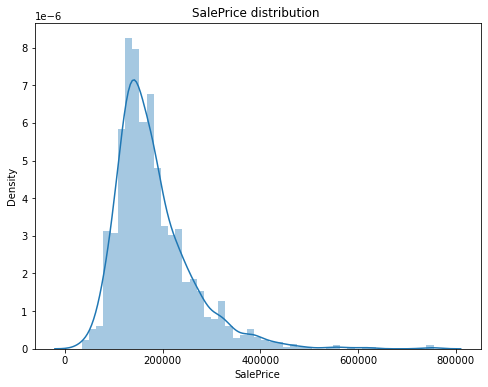

In [18]:
#checking distribution of target variable SalePrice
plt.figure(figsize=[8,6])
sns.distplot(data_frame['SalePrice'])
plt.title( "SalePrice distribution ")
plt.show()

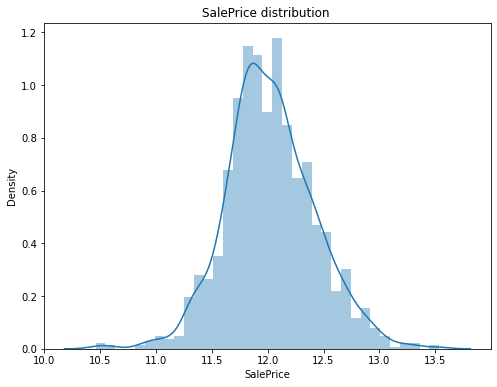

In [19]:
#SalePrice distribution is right skewed, checking log tranformation
plt.figure(figsize=[8,6])
sns.distplot(np.log(data_frame['SalePrice']))
plt.title( "SalePrice distribution ")
plt.show()

In [20]:
data_frame['SalePrice'] = np.log(data_frame['SalePrice'])

#### Derived Metric

In [21]:
#YearBuilt YearRemodAdd GarageYrBlt YrSold MoSold
# Considering years from last built date as reference
refYear = data_frame['YearBuilt'].max()
data_frame['YearBuilt_Age'] = refYear - data_frame['YearBuilt']
data_frame['YearRemodAdd_Age'] = refYear - data_frame['YearRemodAdd']
data_frame['YrSold_Age'] = round((refYear - data_frame['YrSold']) - data_frame['MoSold']/12 ,2)
data_frame['GarageYrBlt_Age'] = refYear - data_frame['GarageYrBlt']

# Dropping redundant columns
data_frame.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [22]:
data_frame[['YearBuilt_Age','YearRemodAdd_Age','YrSold_Age','GarageYrBlt_Age']].head()

,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,7,7,1.83,7.0
1,34,34,2.58,34.0
2,9,8,1.25,9.0
3,95,40,3.83,12.0
4,10,10,1.00,10.0


In [23]:
# Subset all categorical variables
data_categorical = data_frame.select_dtypes(include=['object'])
data_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [24]:
# Subset all numerical variables
data_numerical = data_frame.select_dtypes(exclude=['object'])
data_numerical_col = list(set(data_numerical) - set(['SalePrice']))
data_numerical.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_Age,YearRemodAdd_Age,YrSold_Age,GarageYrBlt_Age
0,60,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,7,7,1.83,7.0
1,20,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,34,34,2.58,34.0
2,60,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,9,8,1.25,9.0
3,70,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,11.849398,95,40,3.83,12.0
4,60,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,12.429216,10,10,1.00,10.0


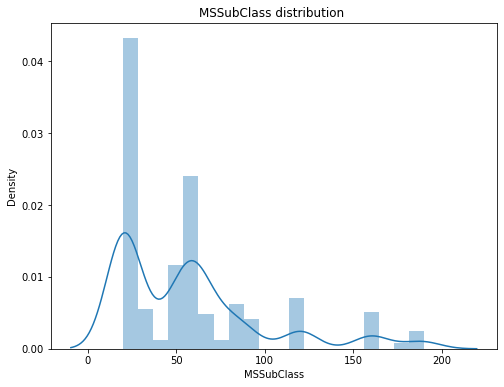

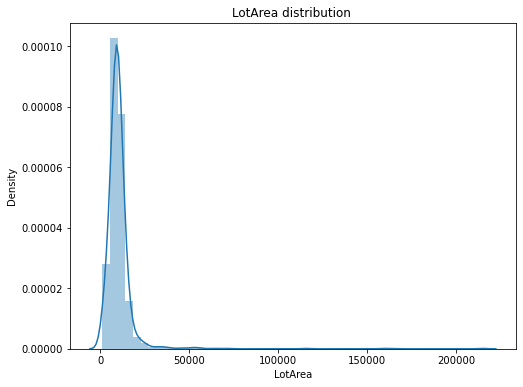

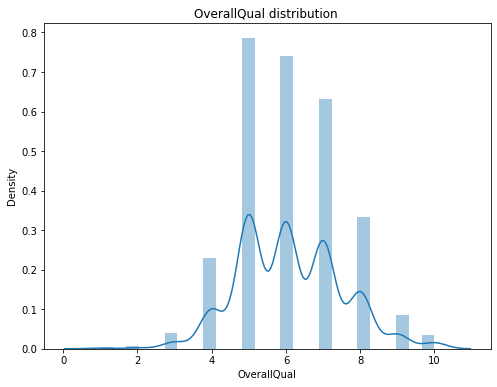

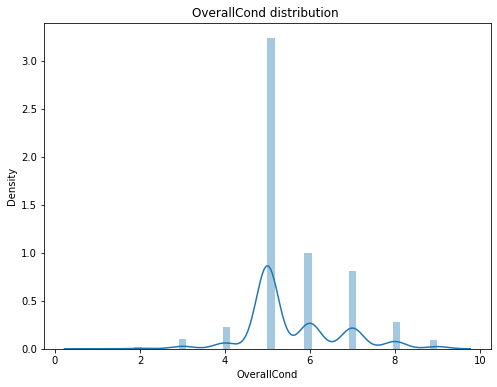

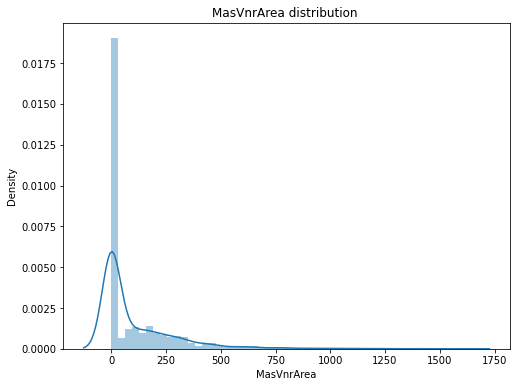

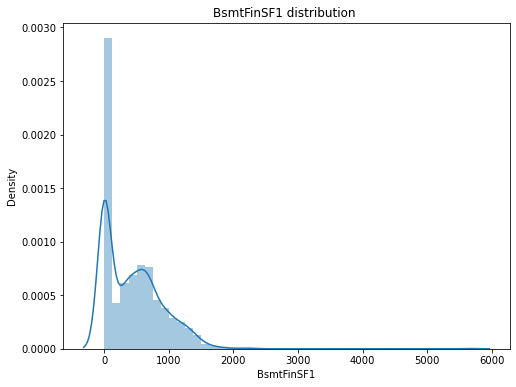

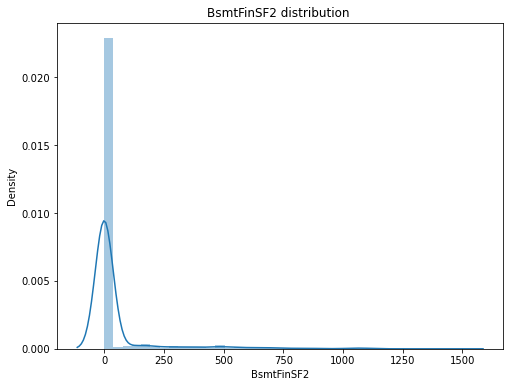

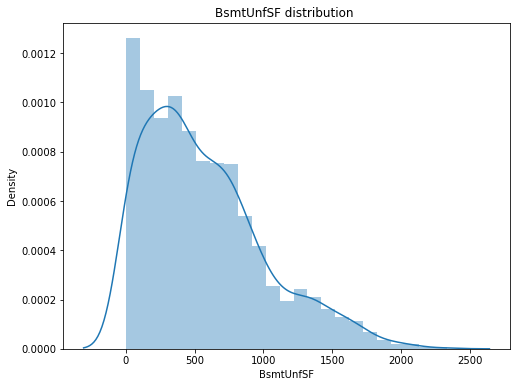

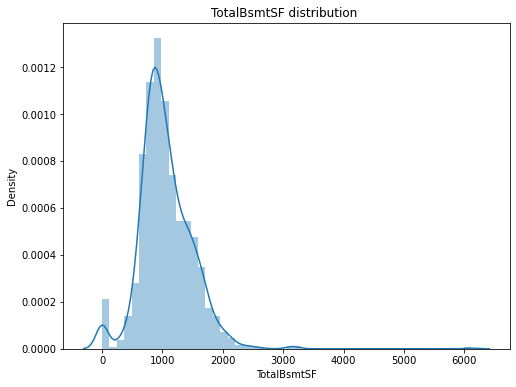

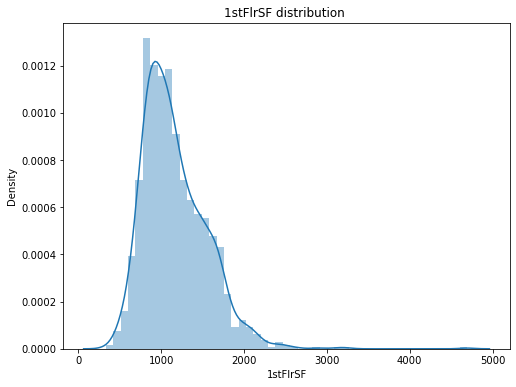

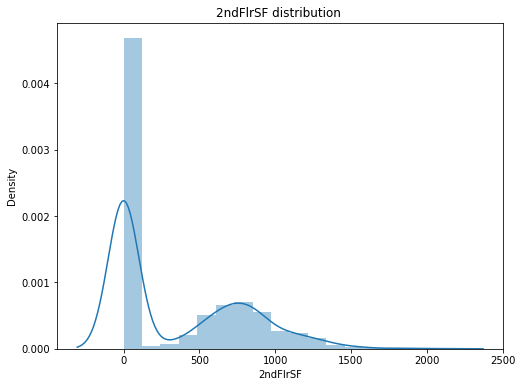

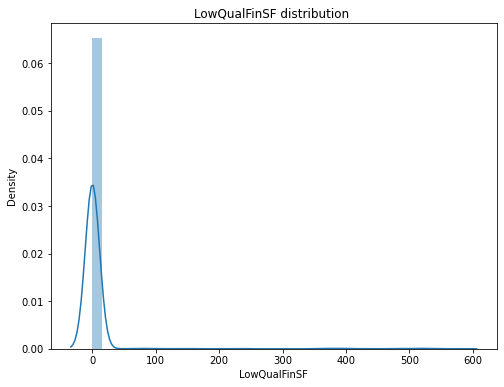

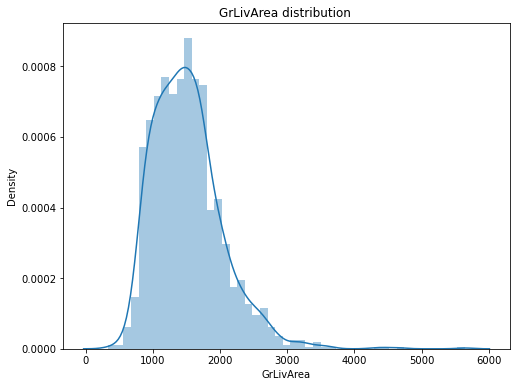

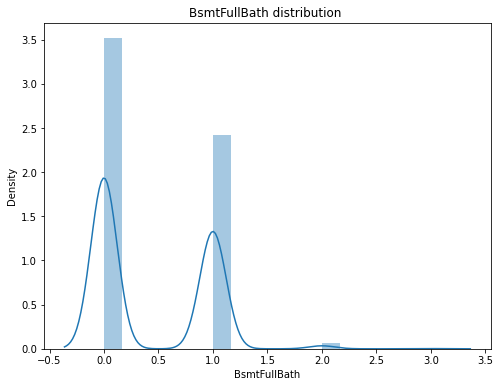

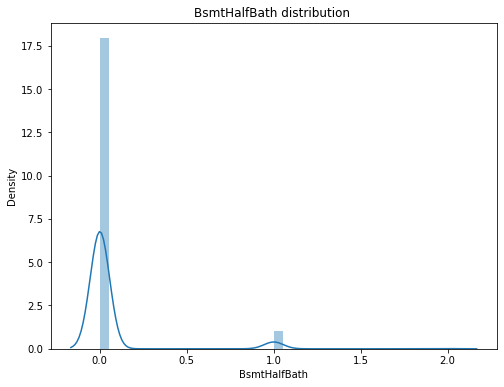

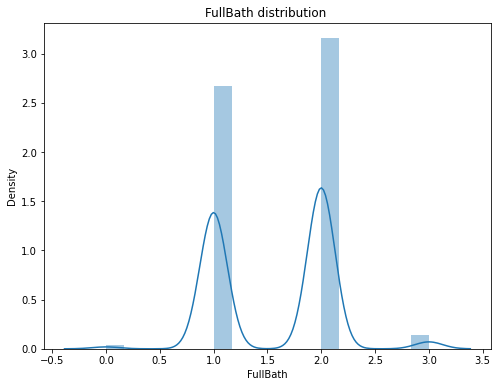

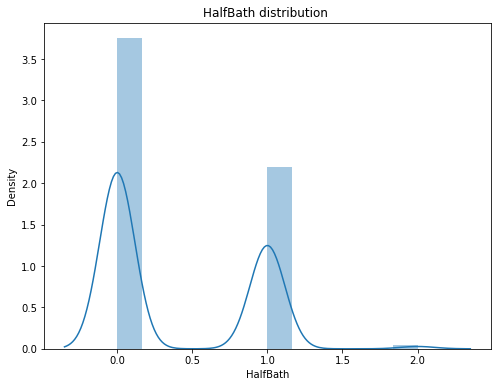

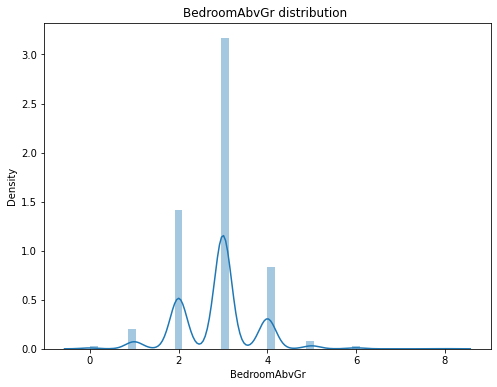

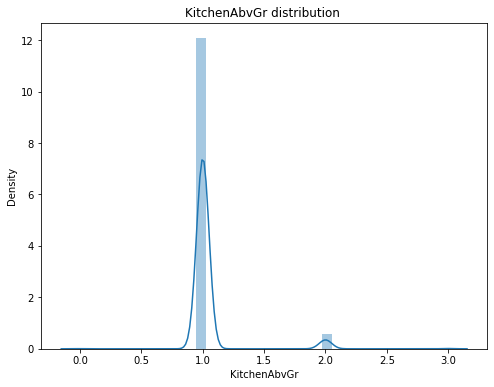

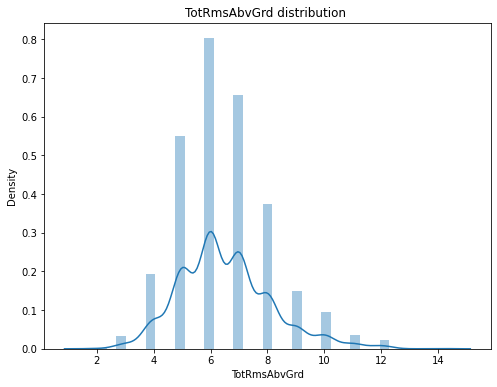

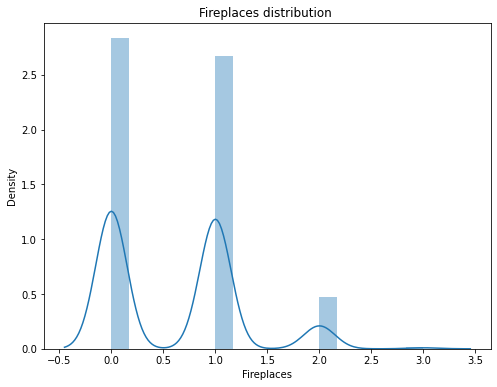

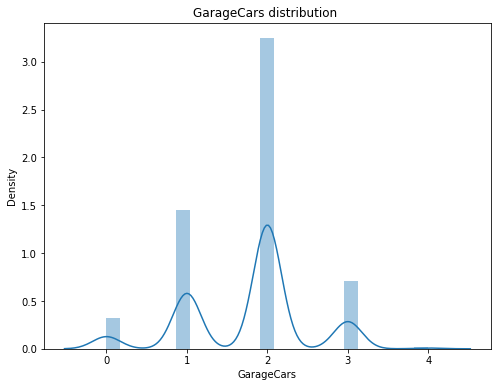

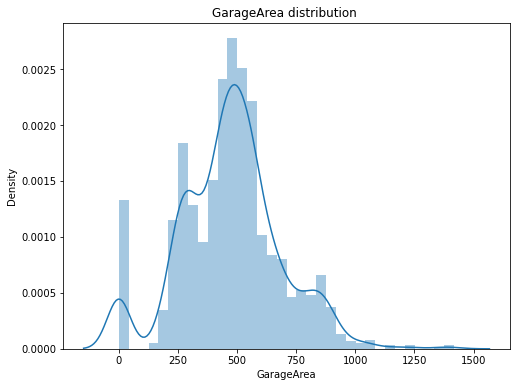

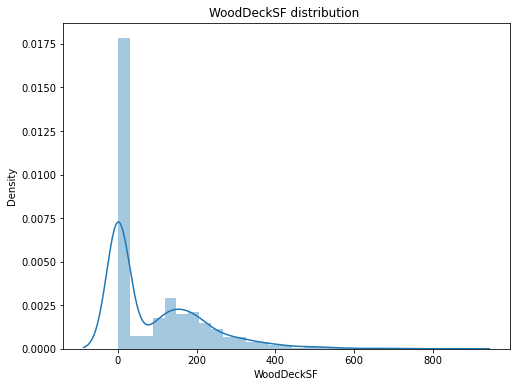

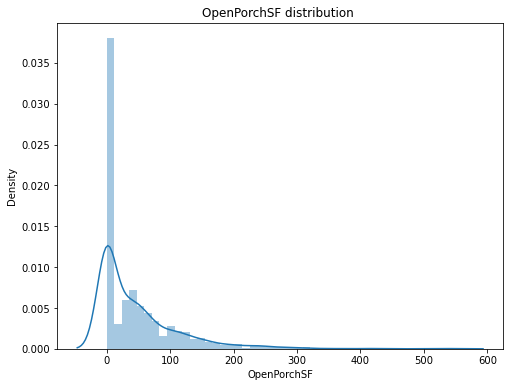

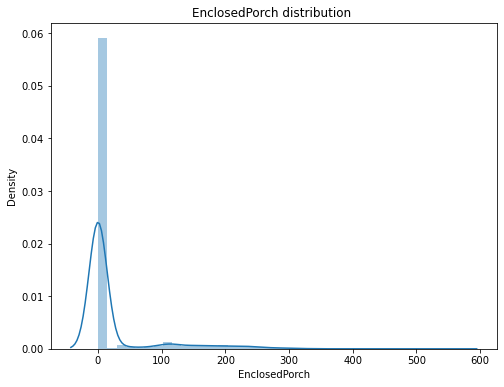

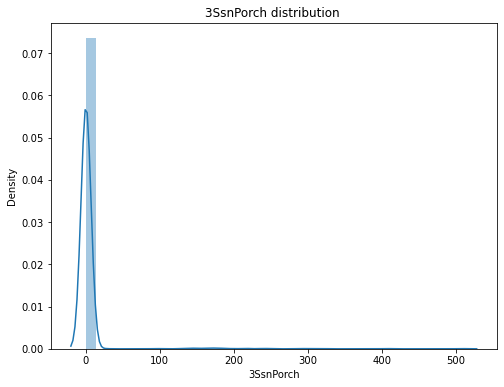

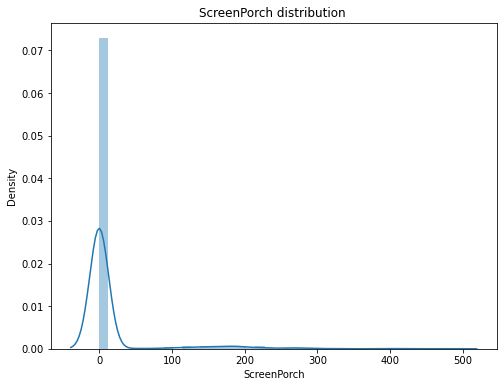

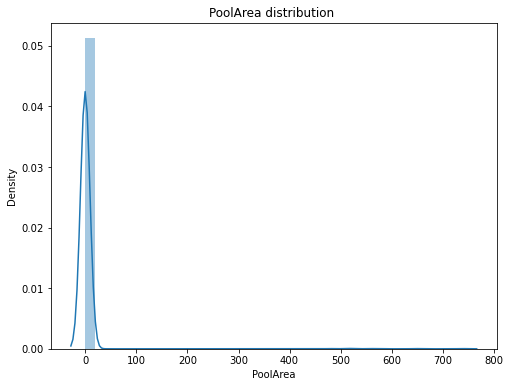

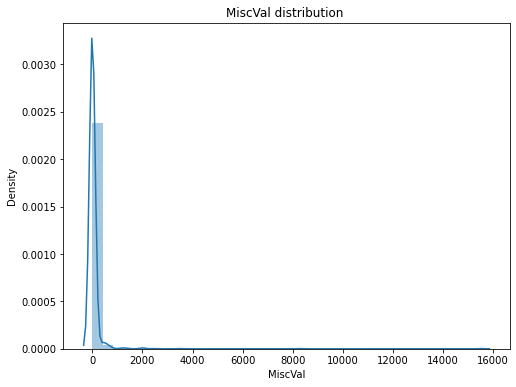

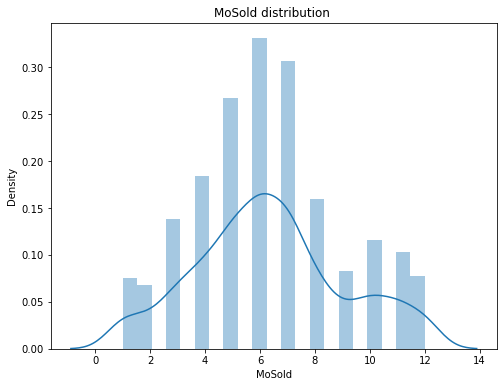

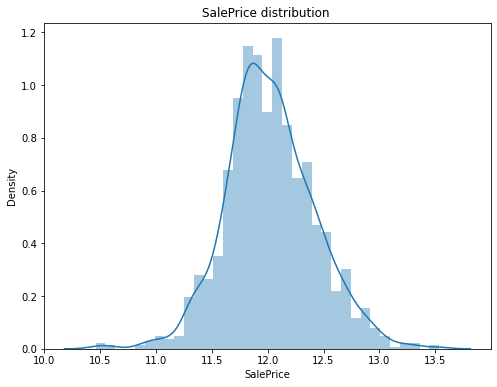

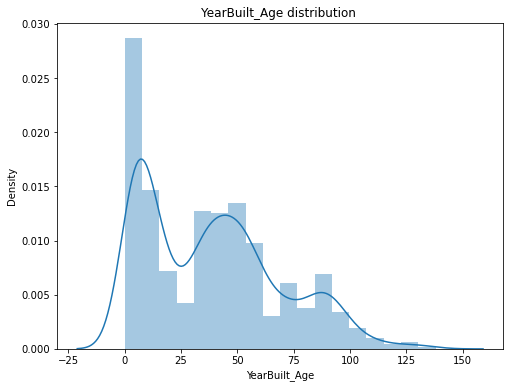

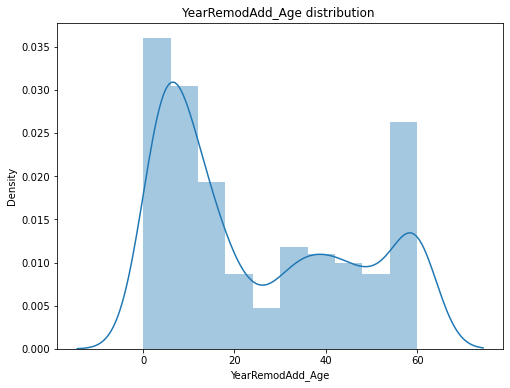

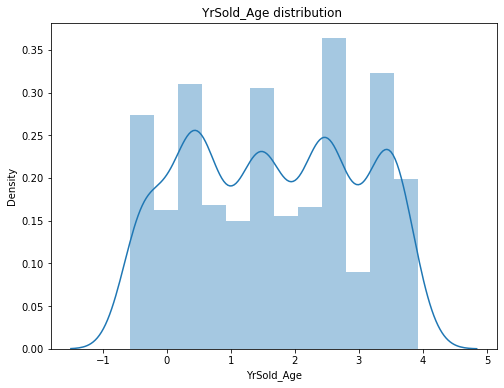

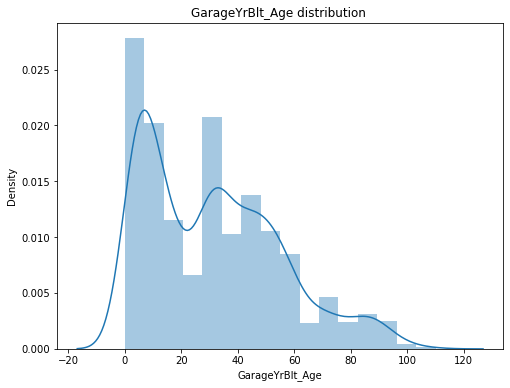

In [25]:
#checking distribution of numerical variable
for col in data_numerical:
    plt.figure(figsize=[8,6])
    sns.distplot(data_frame[col])
    plt.title( col+" distribution ")
    plt.show()

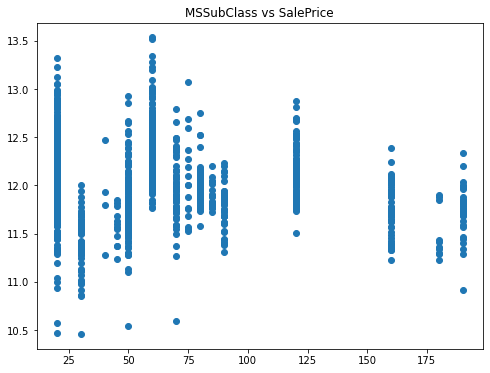

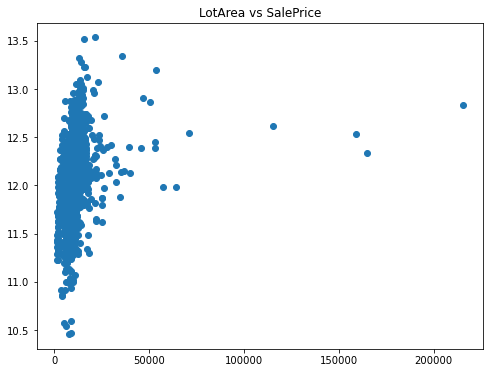

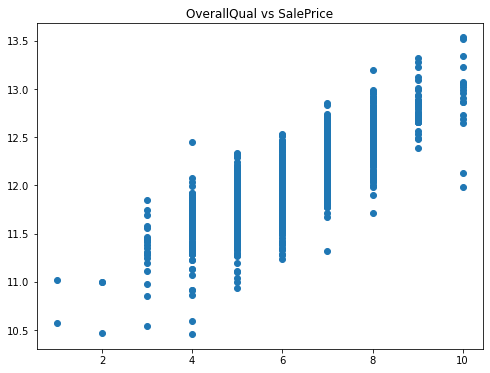

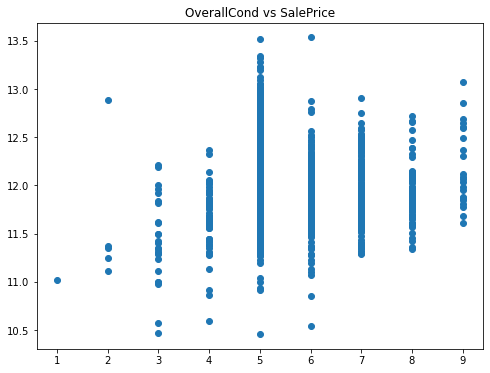

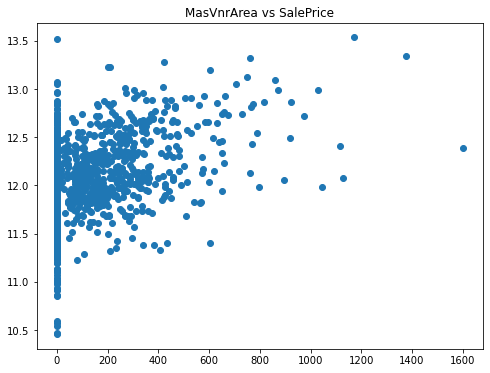

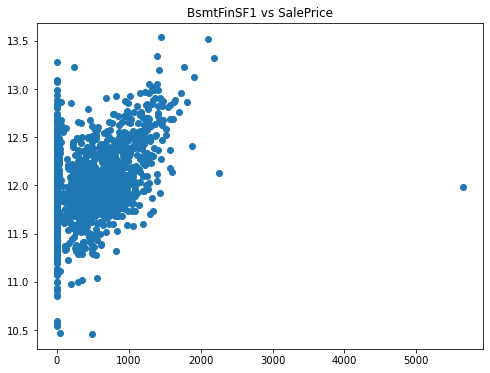

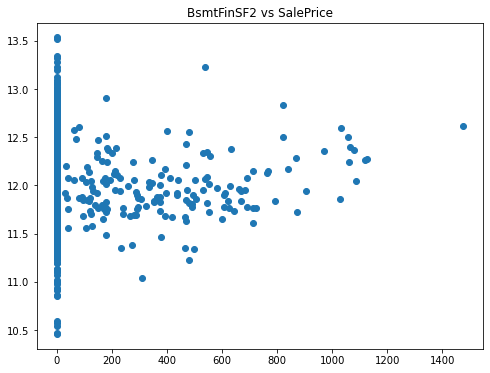

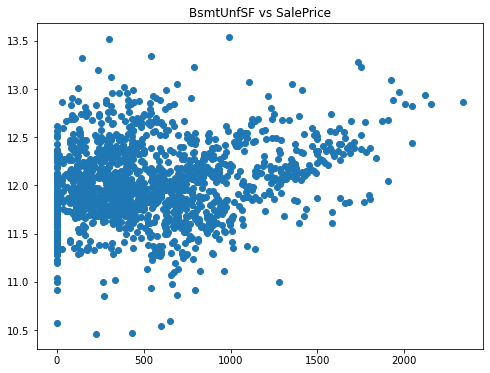

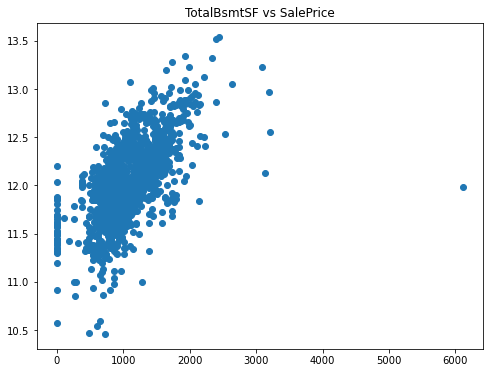

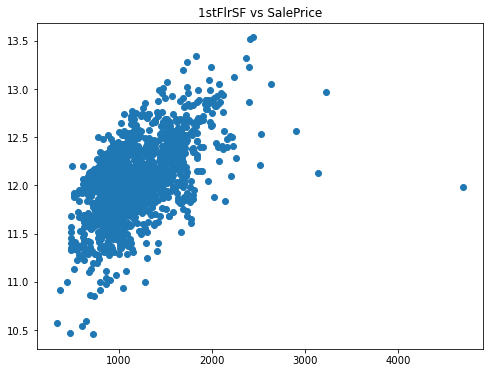

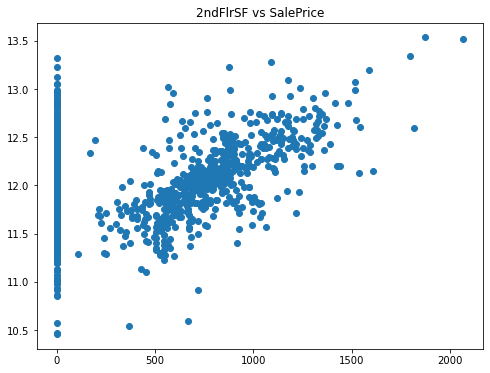

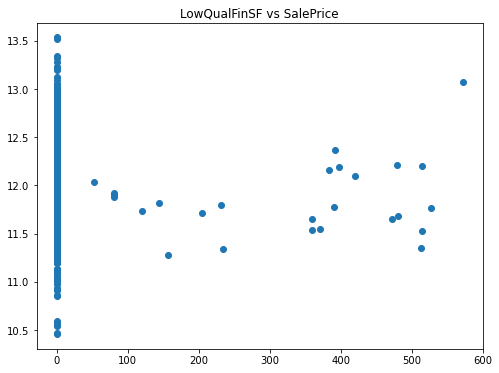

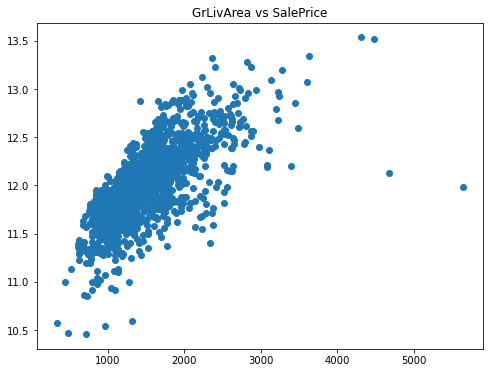

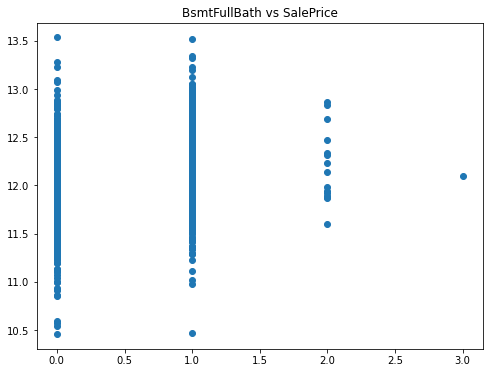

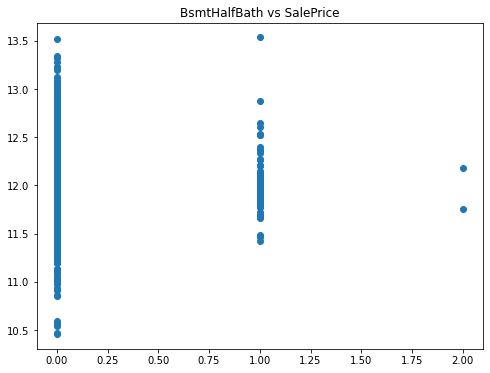

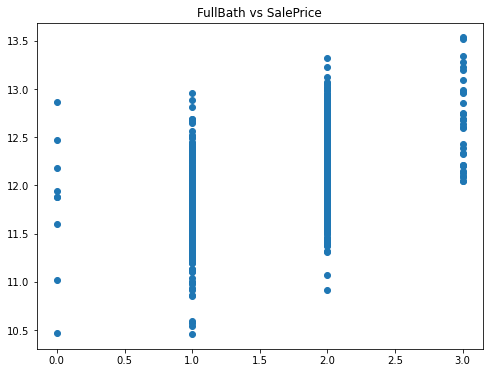

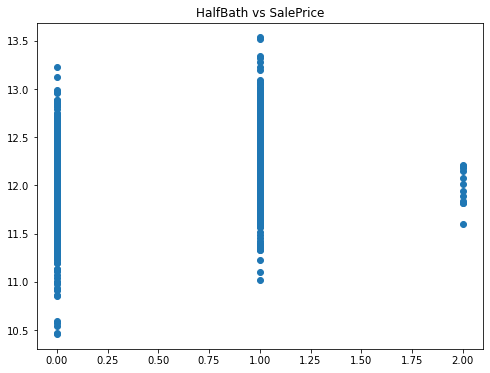

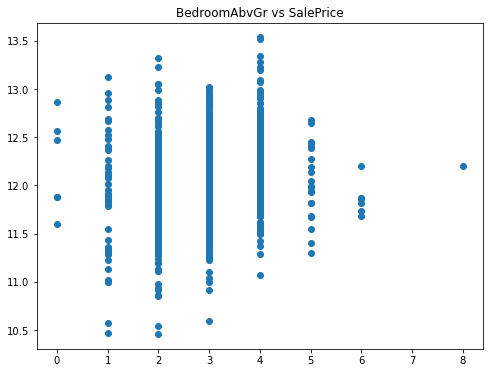

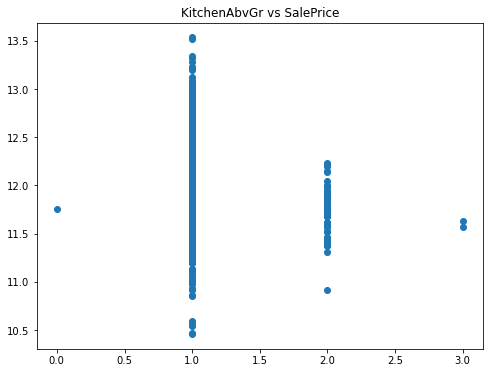

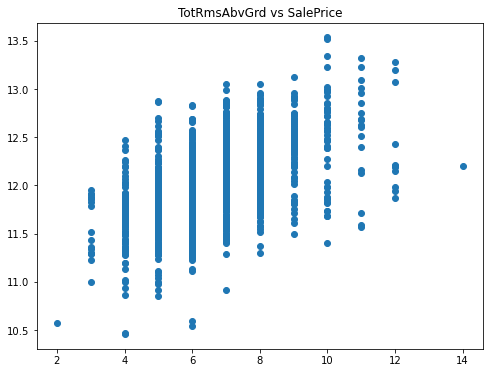

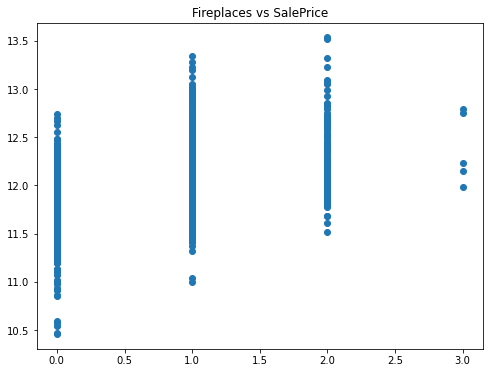

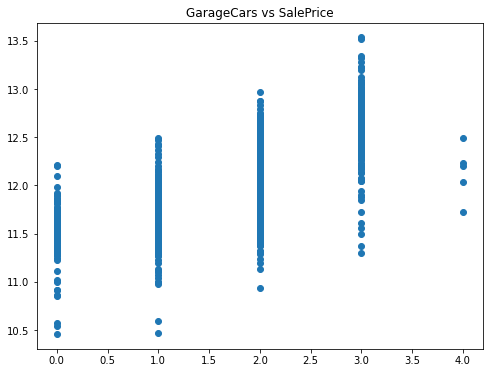

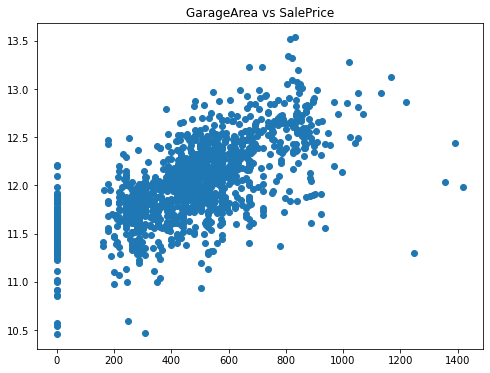

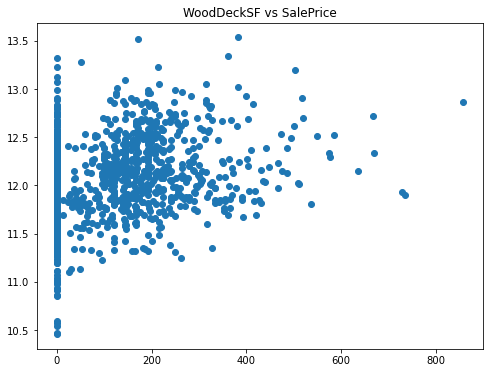

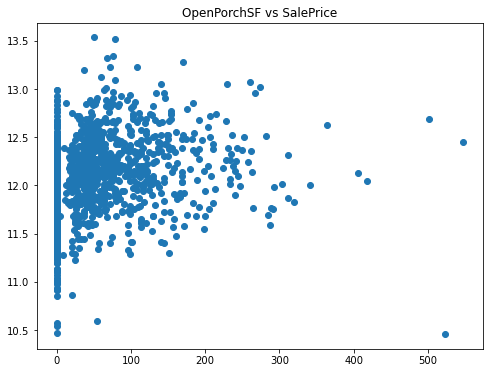

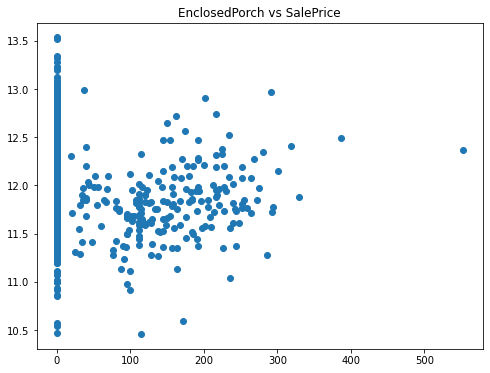

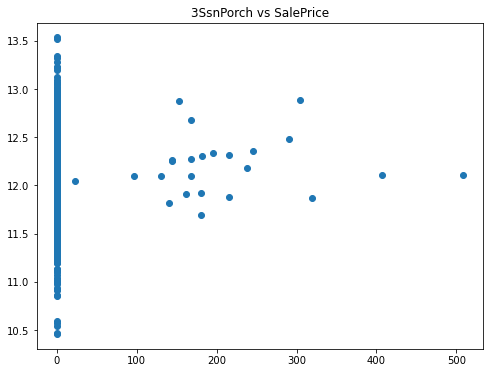

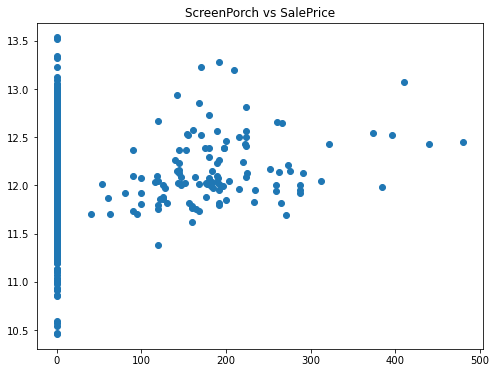

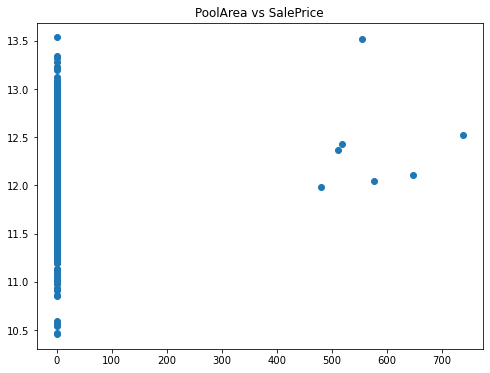

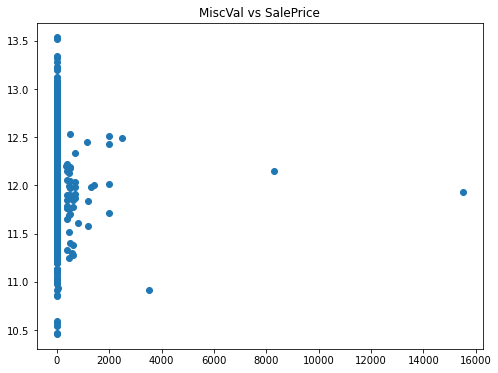

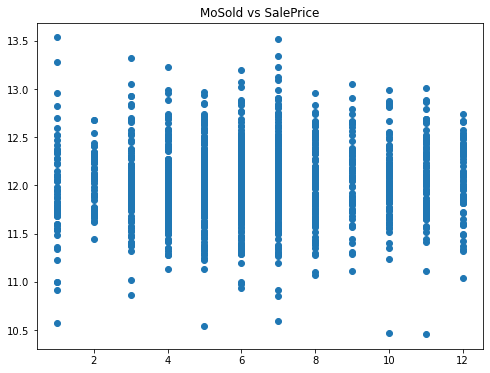

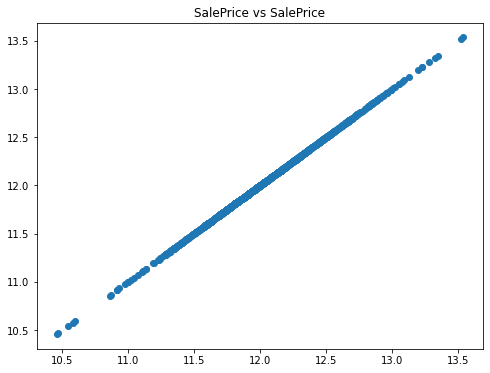

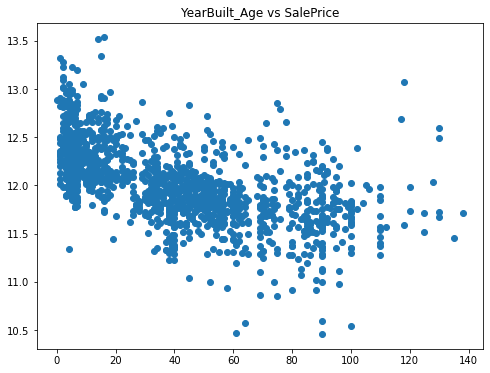

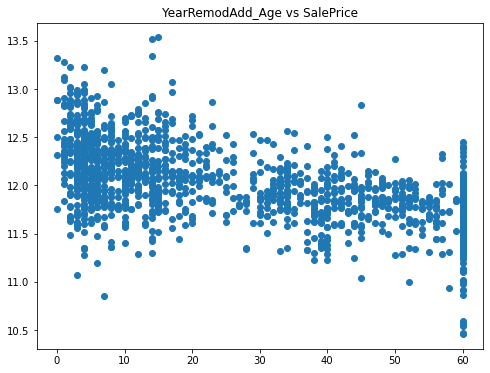

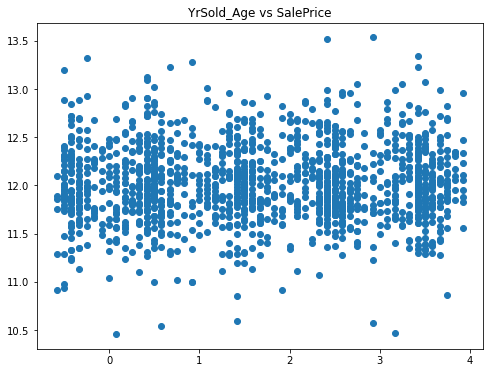

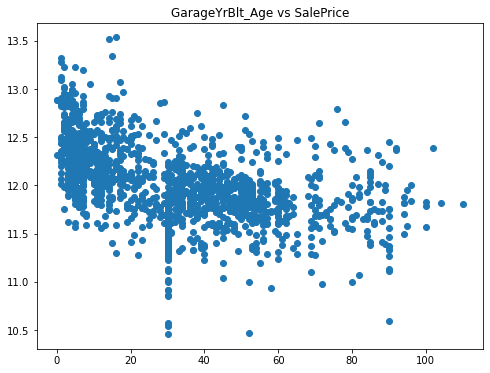

In [26]:
#checking linearity of numerical columns against target variable
for col in data_numerical:
    plt.figure(figsize=[8,6])
    plt.scatter(x=data_frame[col], y=data_frame['SalePrice'])
    plt.title(col + " vs SalePrice")
    plt.show()

Few of columns are skewed, but there is no assumption of normailty among independent variable distribution.
log transforming the columns to have linearity with dependent variable

In [27]:
skewedCols = ['MSSubClass','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
             'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
            'ScreenPorch','PoolArea','MiscVal','GarageYrBlt_Age']
for col in skewedCols:
     data_frame[col] = data_frame[col].apply(lambda x: 0 if np.log(x)<0 else np.log(x))

#### Checking Outliers

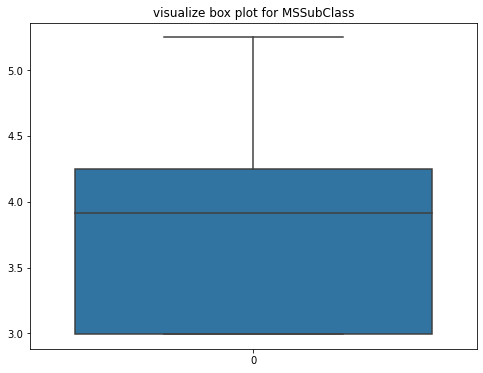

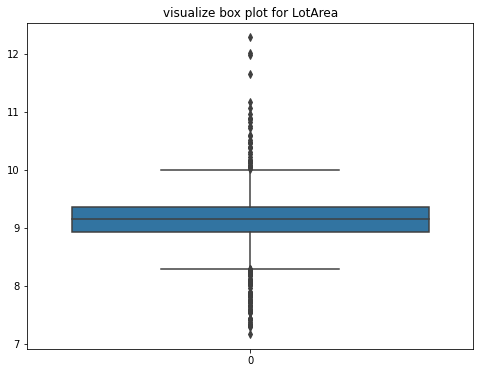

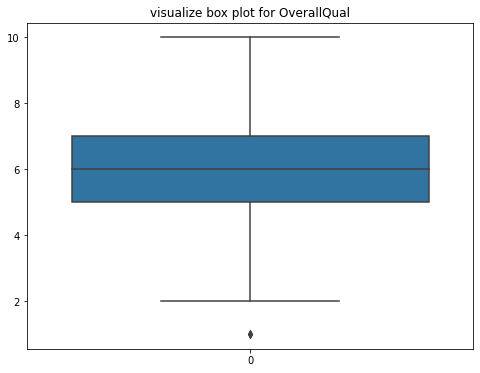

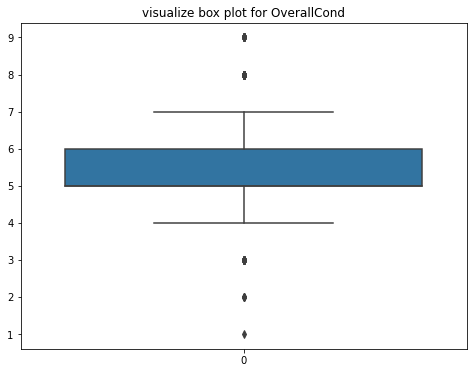

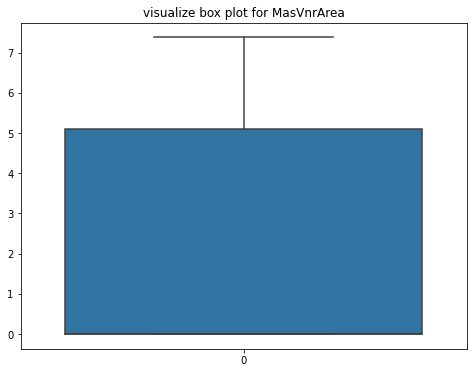

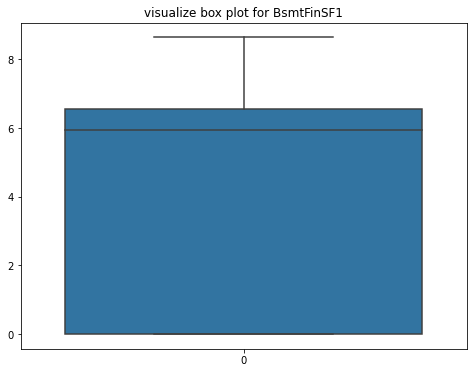

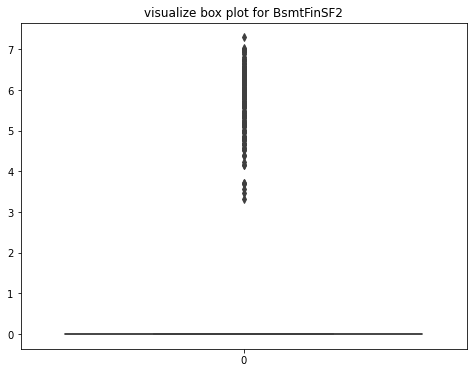

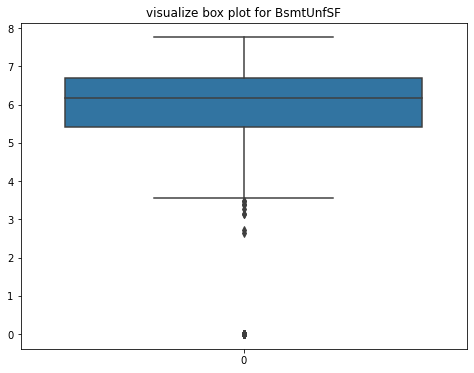

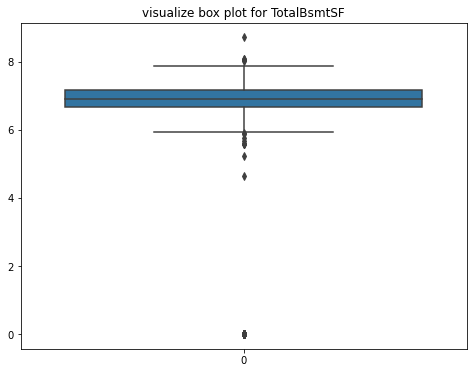

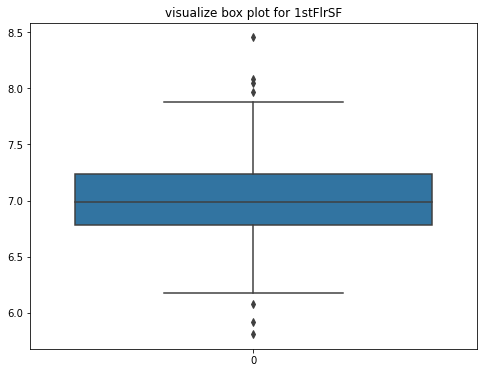

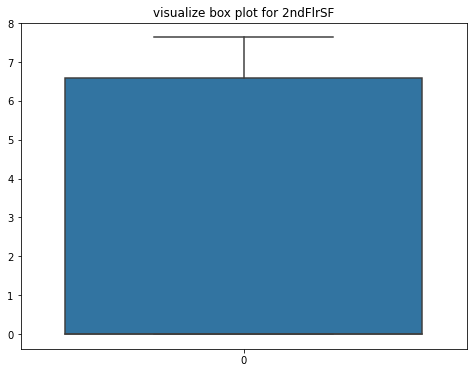

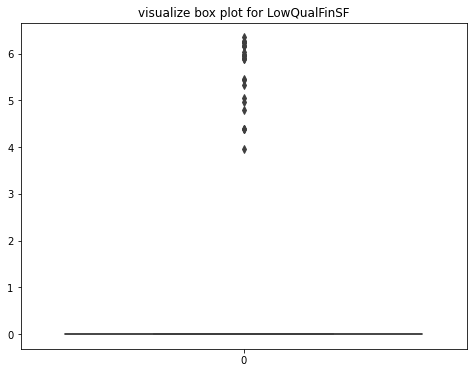

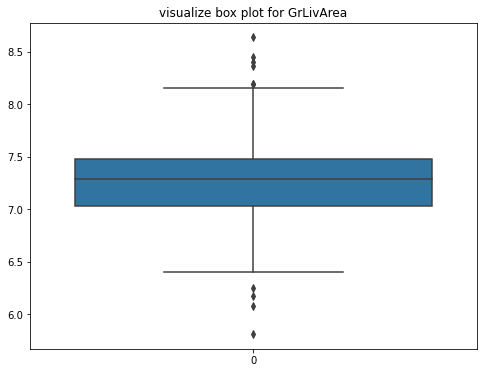

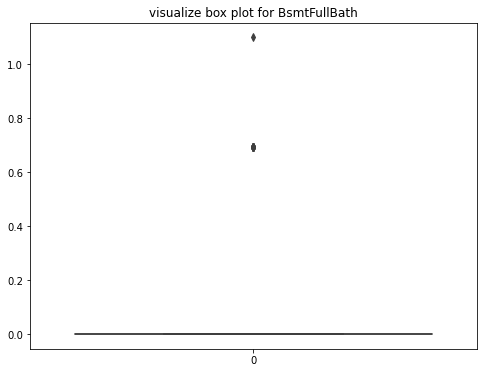

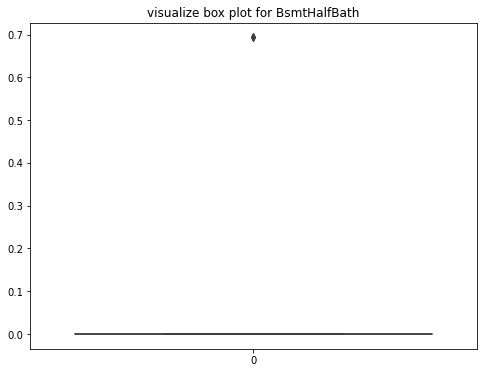

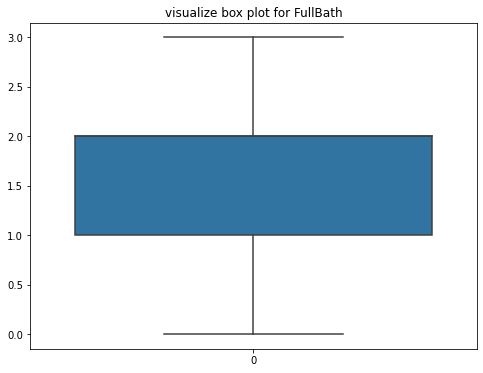

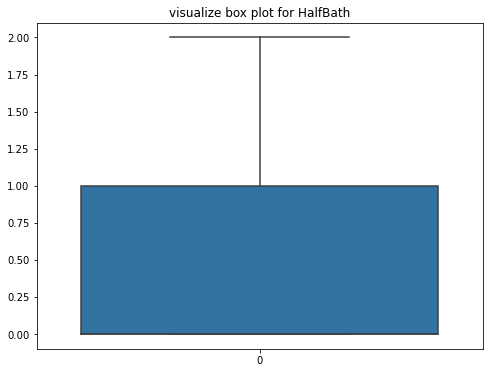

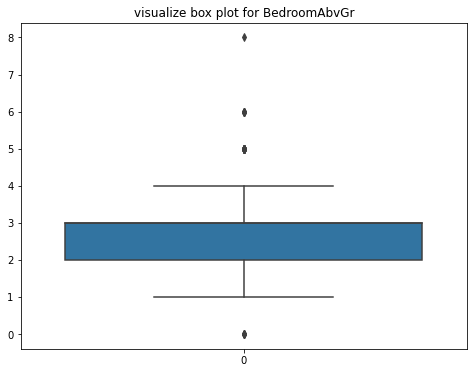

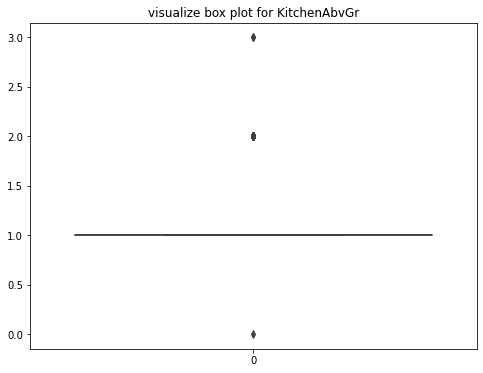

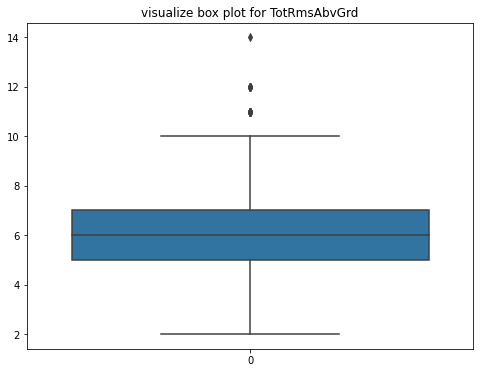

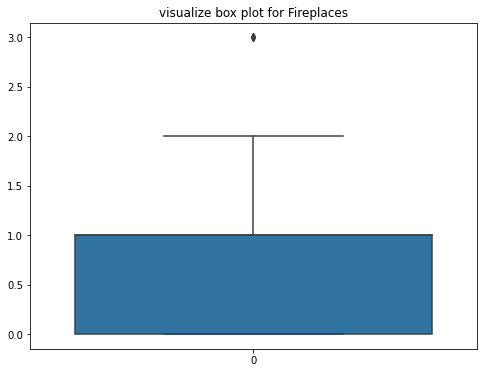

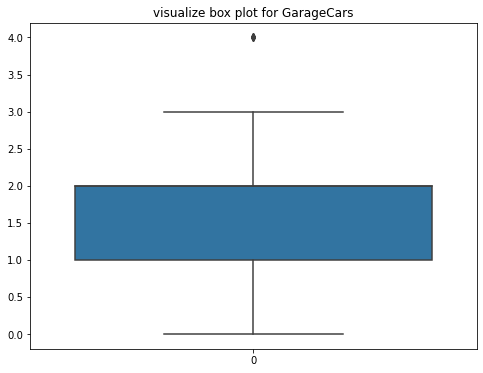

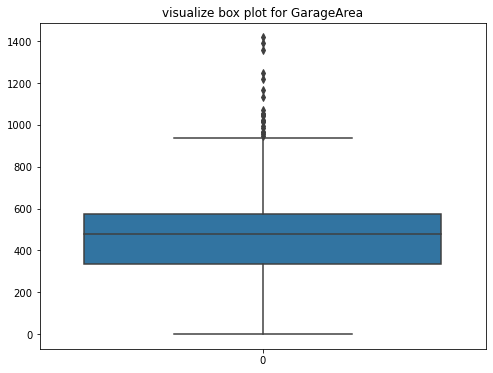

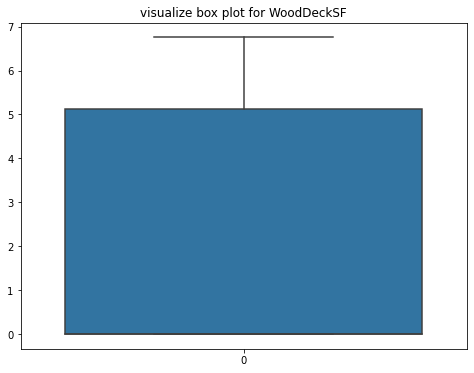

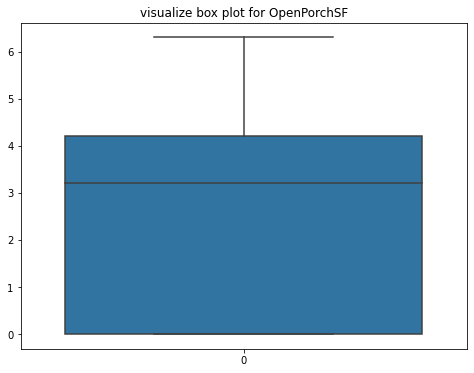

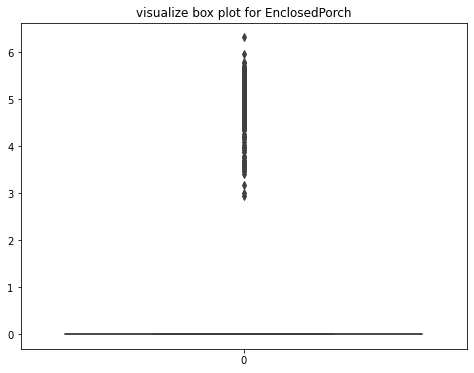

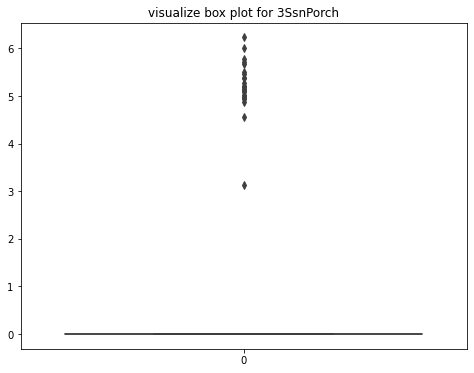

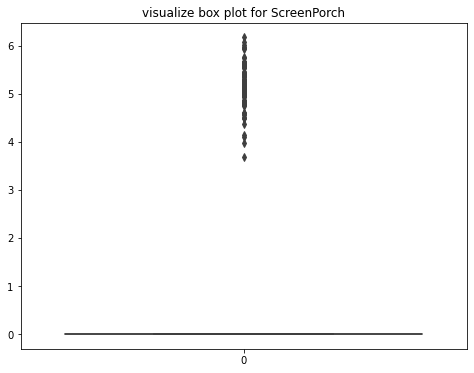

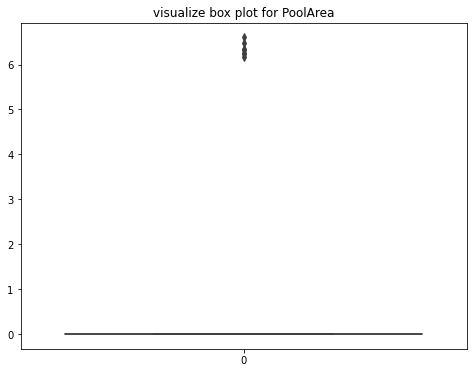

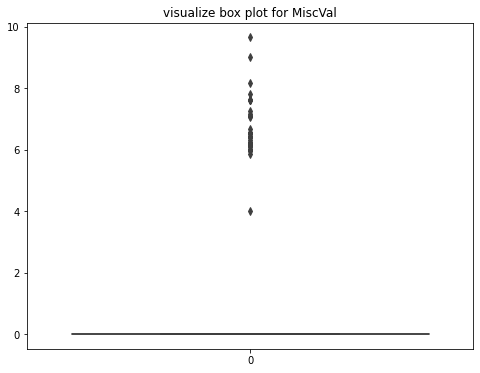

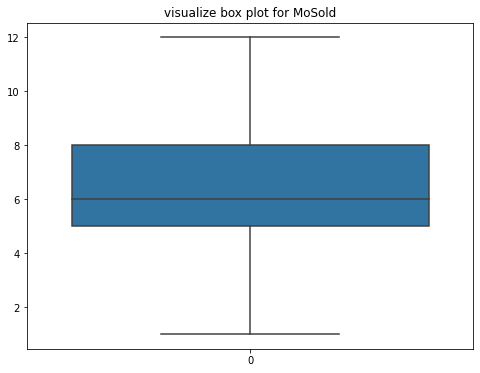

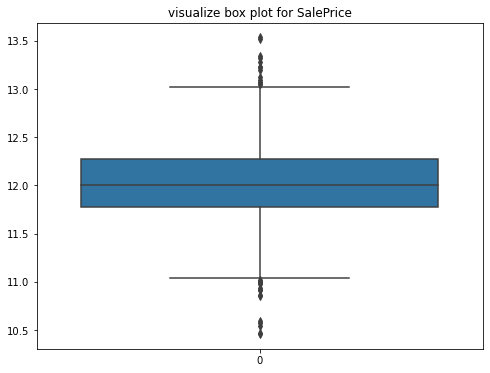

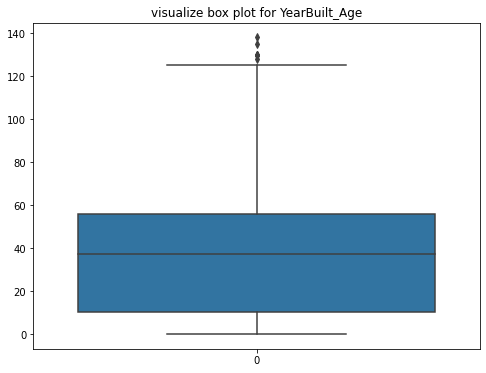

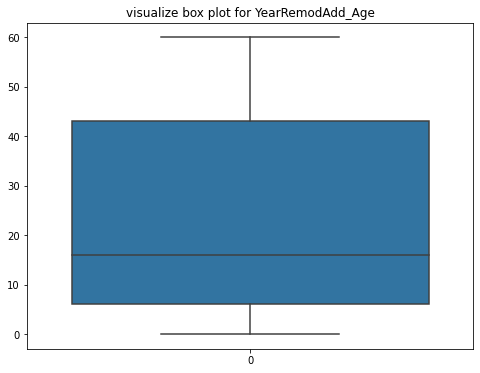

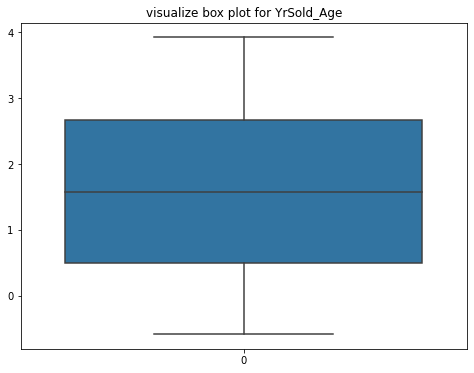

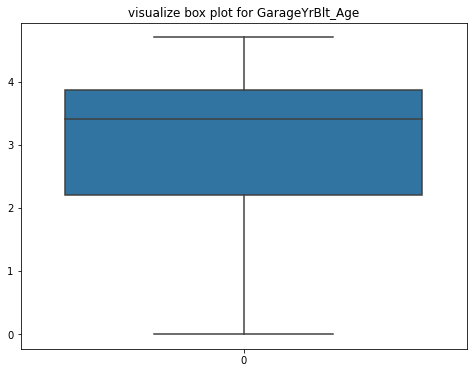

In [28]:
for col in data_numerical:
    plt.figure(figsize=[8,6])
    sns.boxplot(data=data_frame[col])
    plt.title("visualize box plot for "+col)
    plt.show()

In [29]:
# Observation from box plot, columns "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF",
#"1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF","OpenPorchSF"
# seem to have outliers - however from data dictionary we cannot define the boundary or value range for these columns
# Based on the value range outliers can be treated by dropping if not within boundary
# Alternatively inter quantile range can be used to drop outliers

data_outliers = data_frame[["LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF"]]

def drop_outliers(x):    
    for col in data_outliers:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   


Note : On dropping the outliers and modelling, the final model seems to be overfit 
hence not dropping the outliers as they maybe relevant<br>
#data_frame = drop_outliers(data_frame)

#### Checking correlation between variables

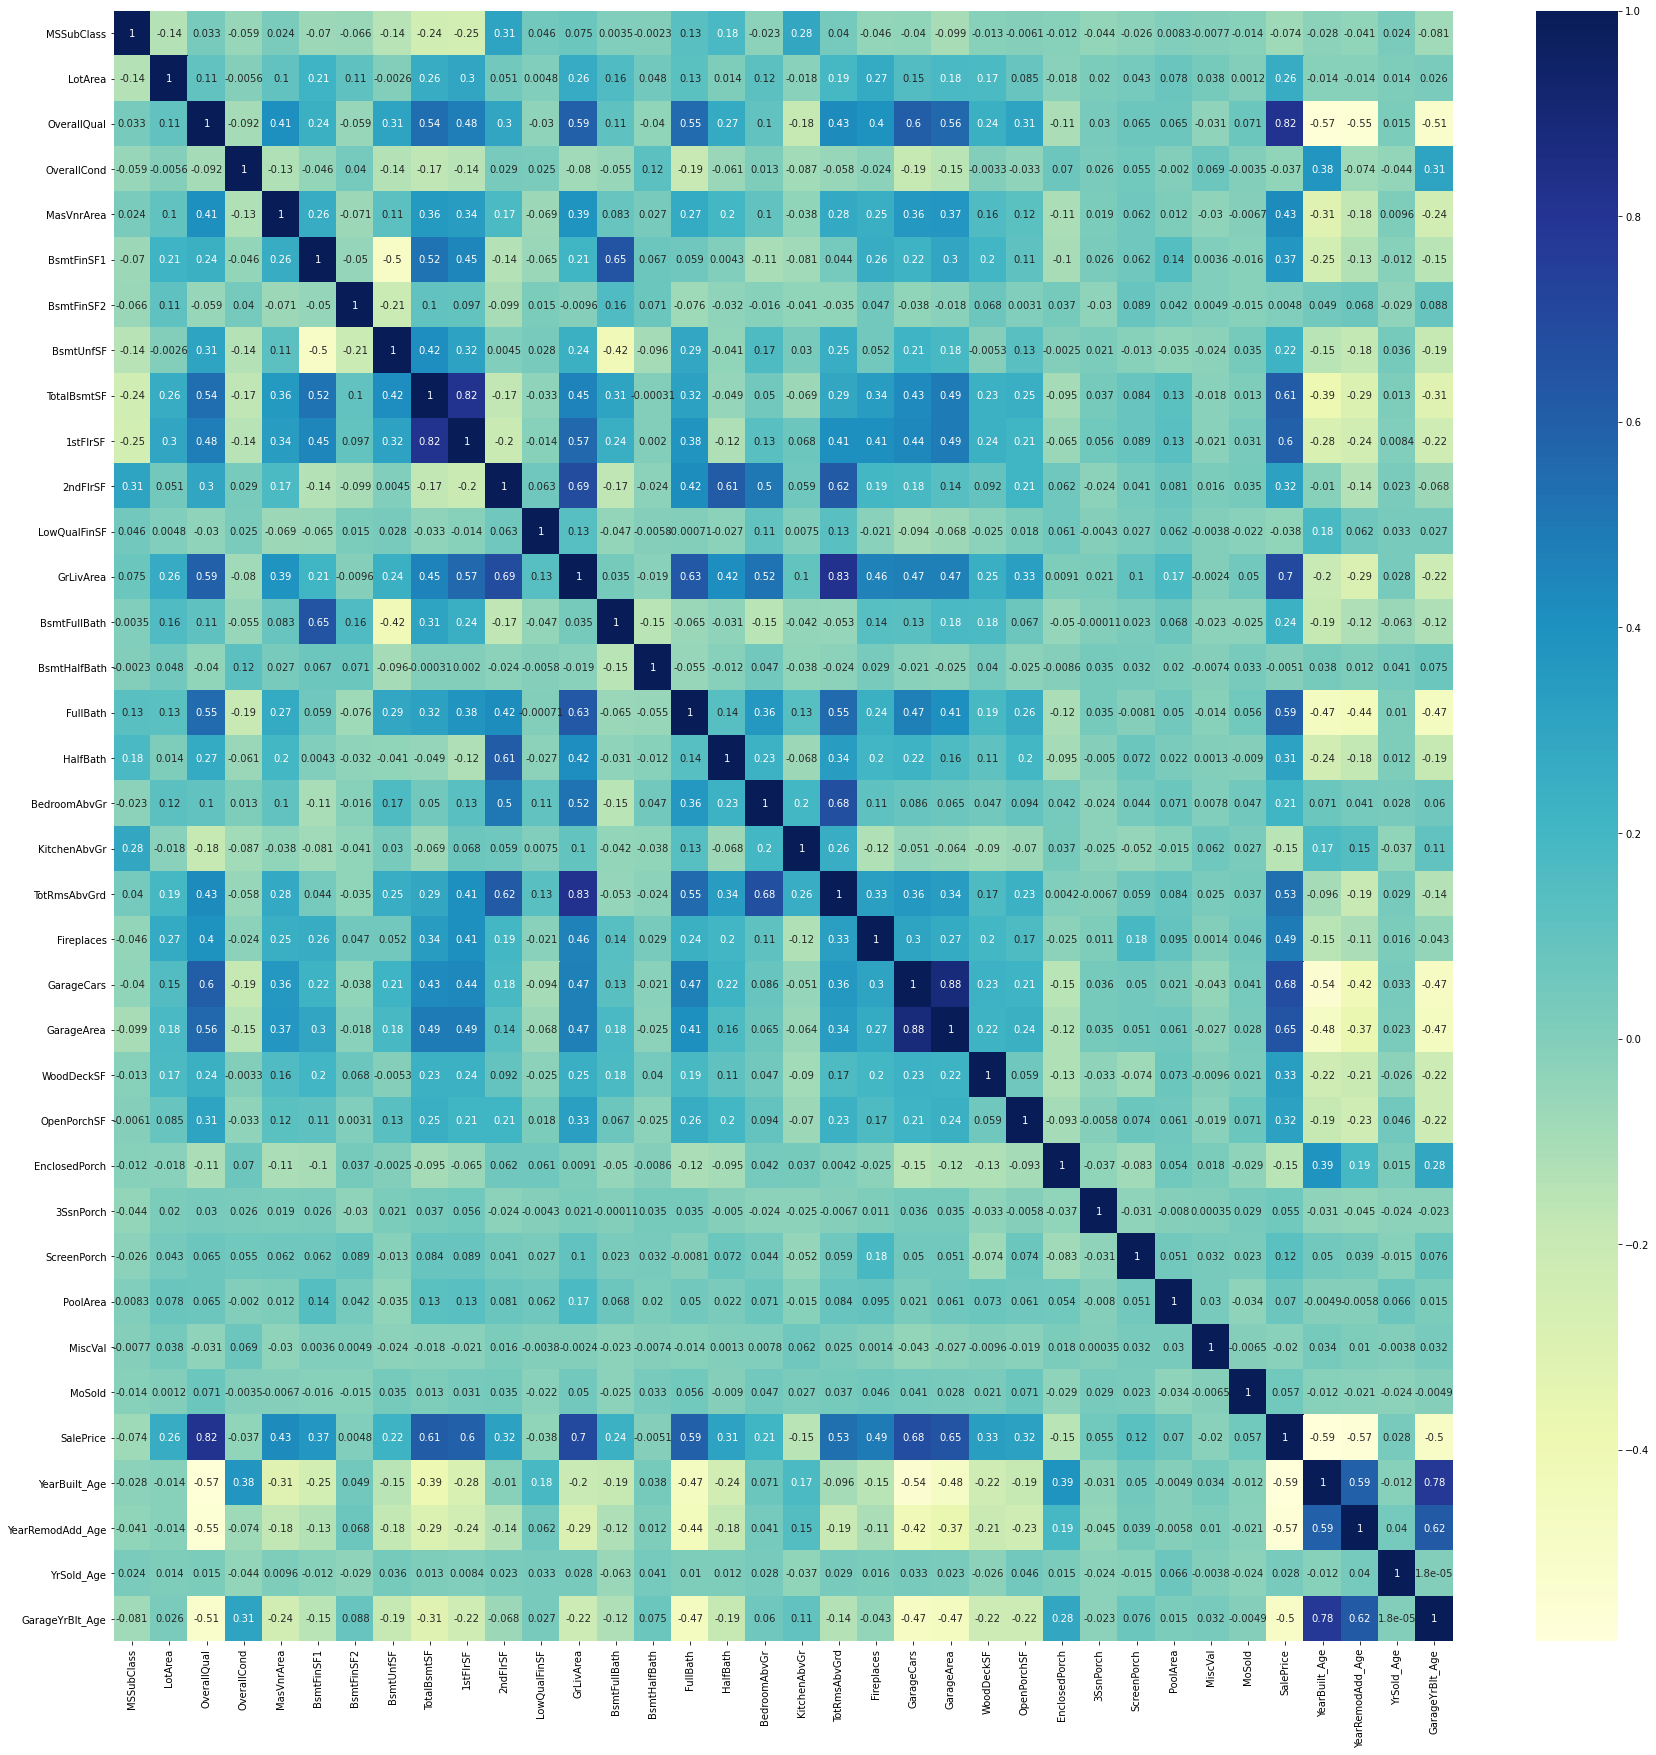

In [30]:
plt.figure(figsize=[30,30])
sns.heatmap(data_numerical.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [31]:
#Drop highly coorelated columns
#GarageYrBlt_Age YearBuilt_Age
#GrLivArea TotRmsAbvGrd
#GarageCars GarageArea
#1stFlrSF TotalBsmtSF 
data_frame = data_frame.drop(['GarageYrBlt_Age', 'GrLivArea','GarageCars', '1stFlrSF'], axis=1)
data_numerical = list(set(data_numerical) - set(['GarageYrBlt_Age', 'GrLivArea','GarageCars', '1stFlrSF']))

In [32]:
data_frame.shape

(1460, 70)

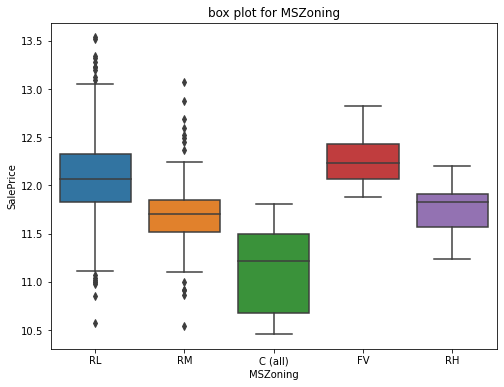

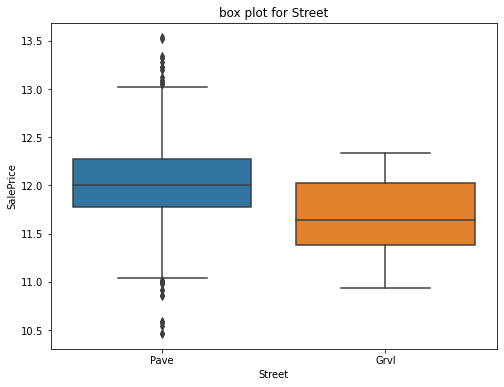

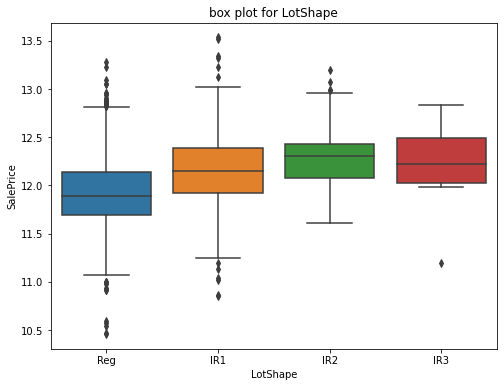

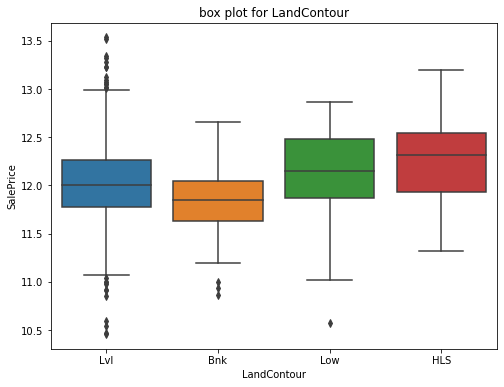

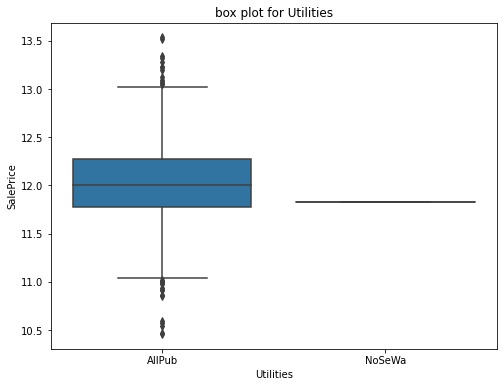

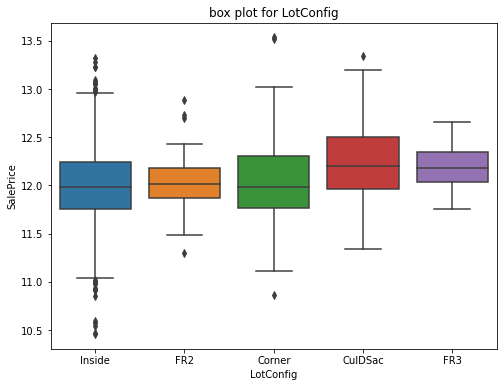

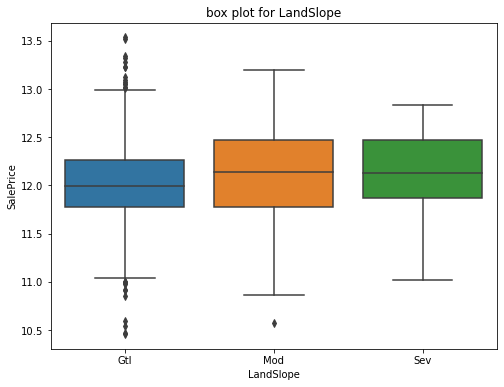

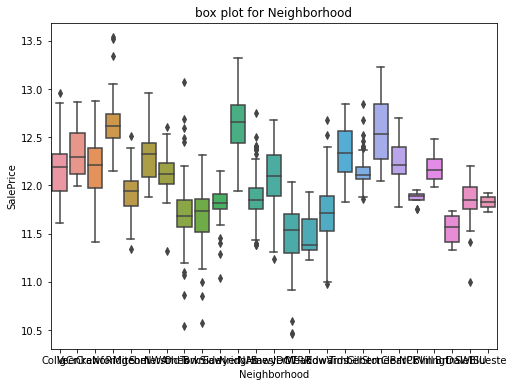

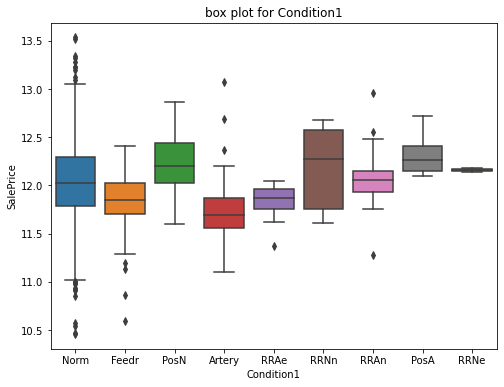

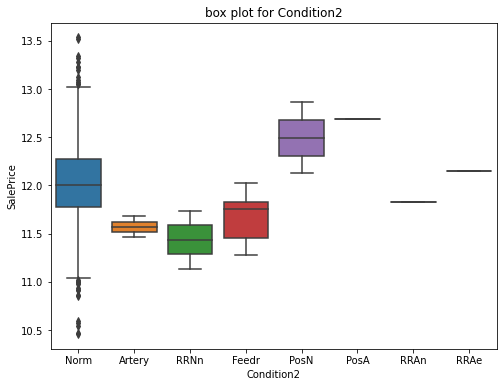

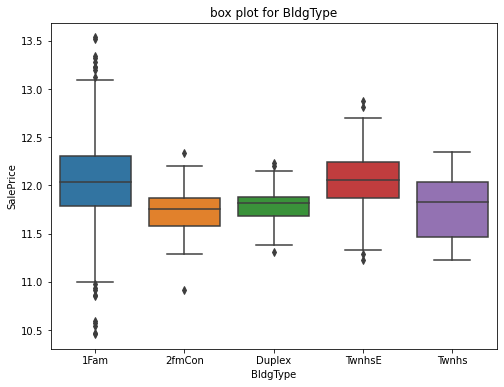

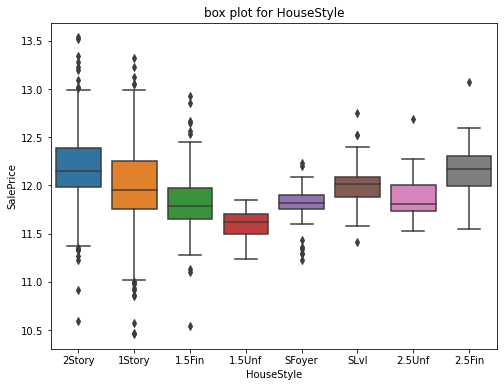

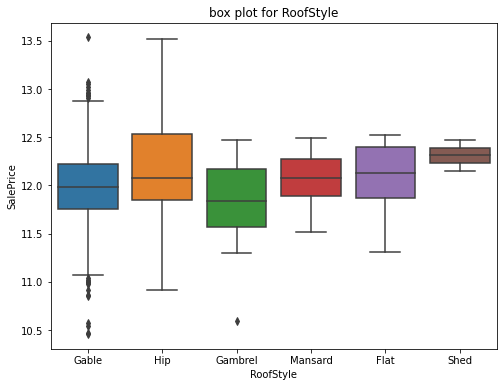

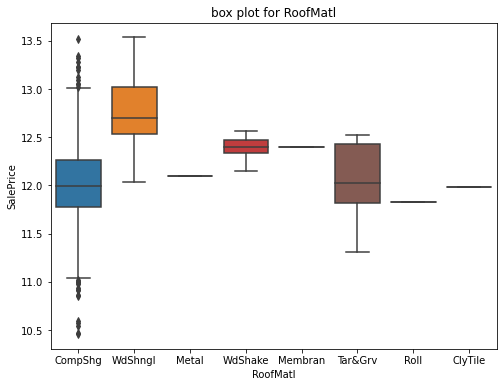

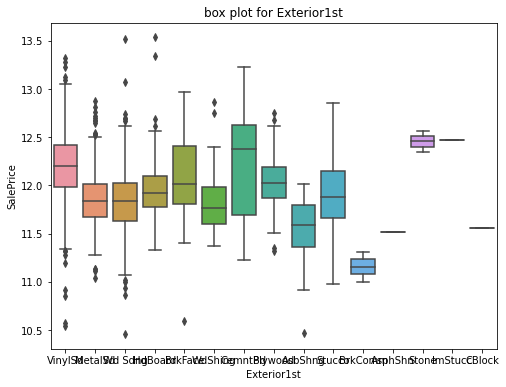

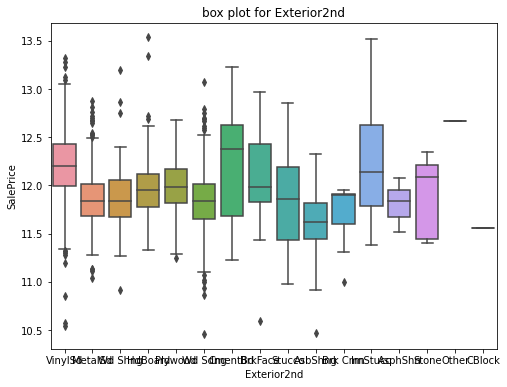

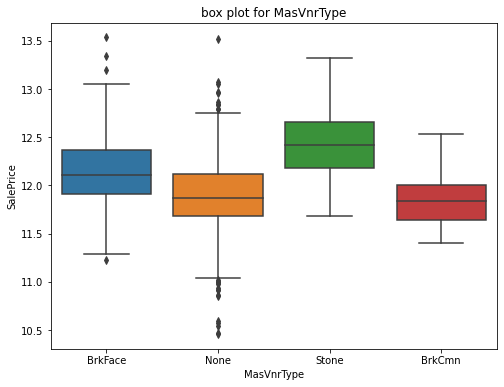

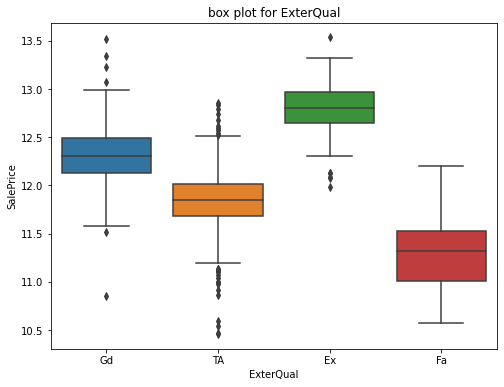

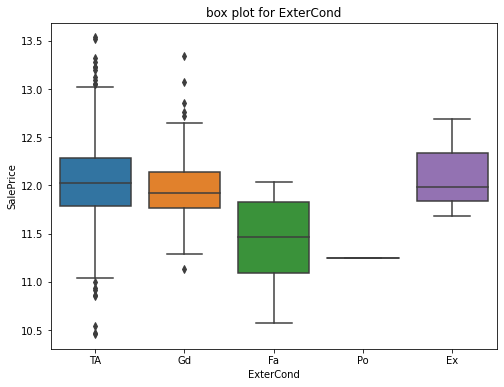

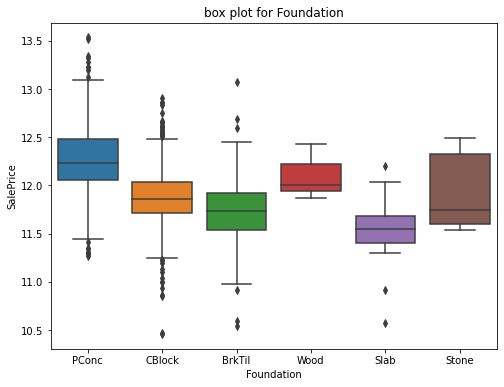

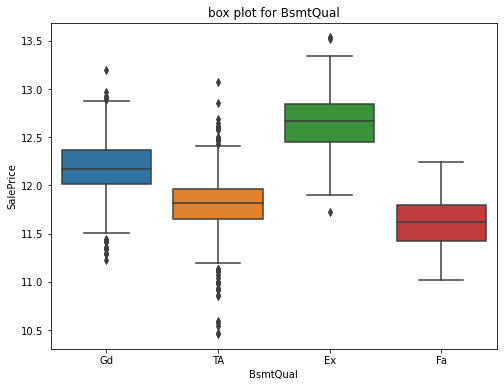

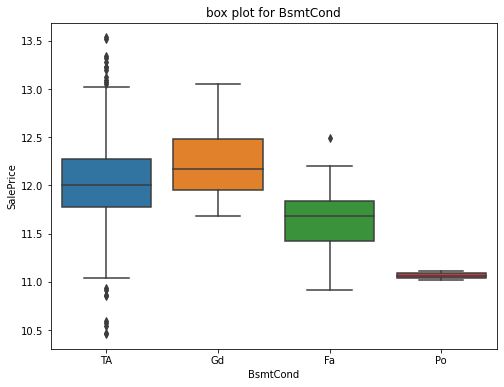

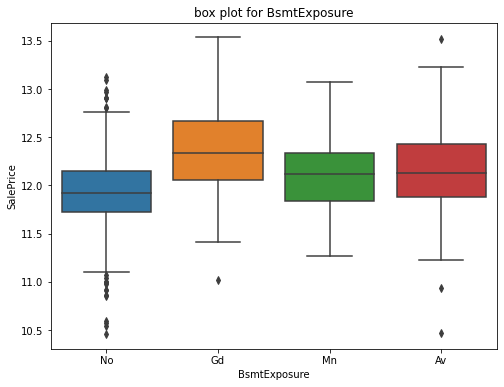

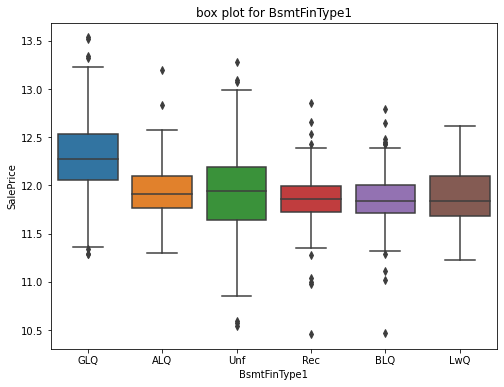

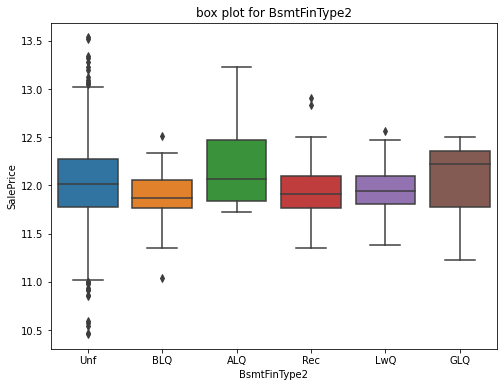

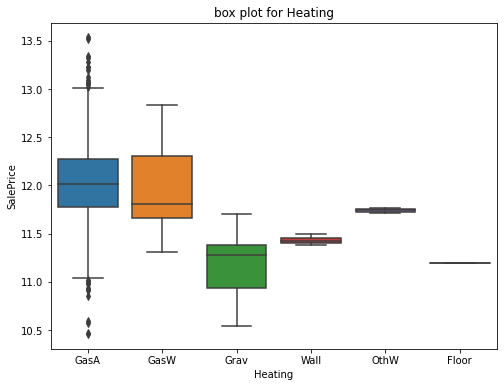

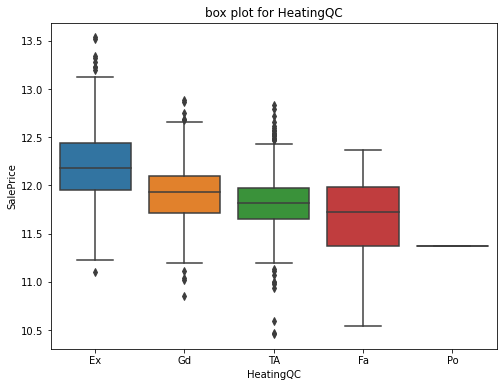

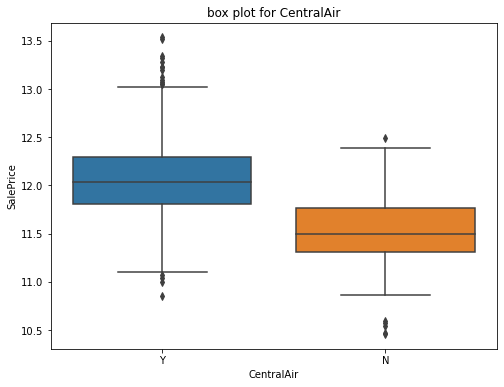

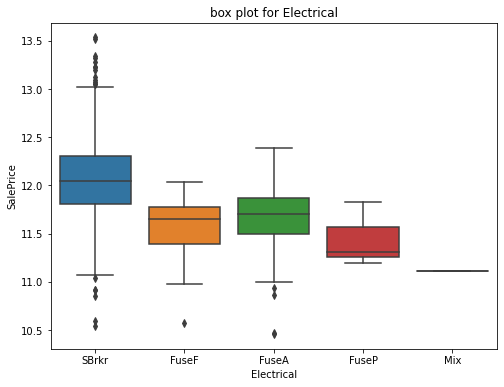

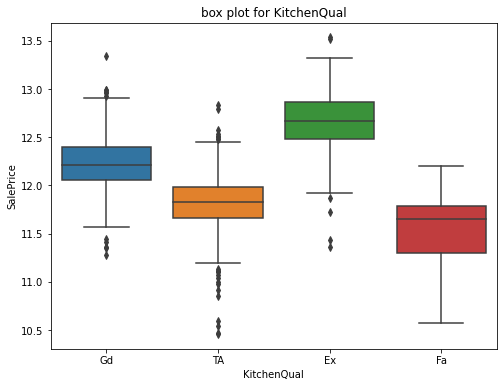

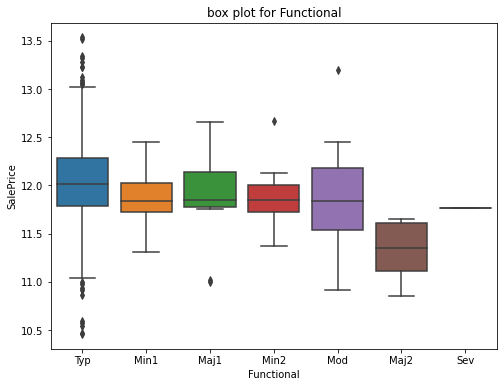

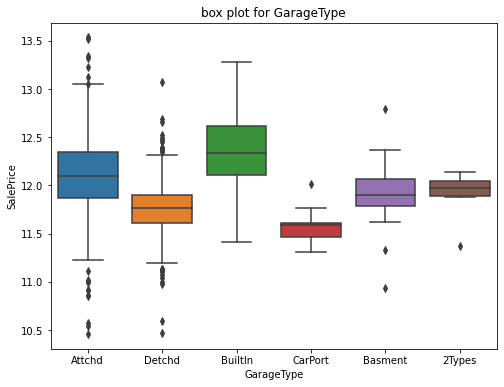

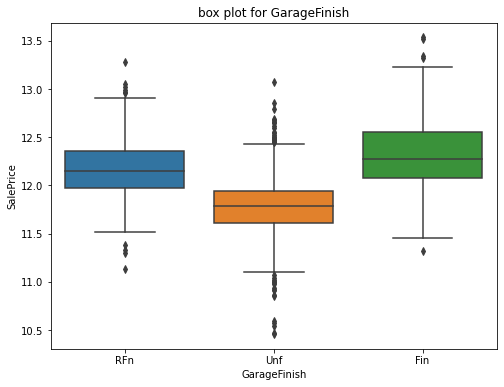

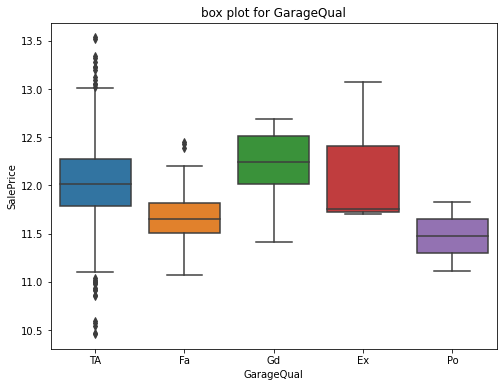

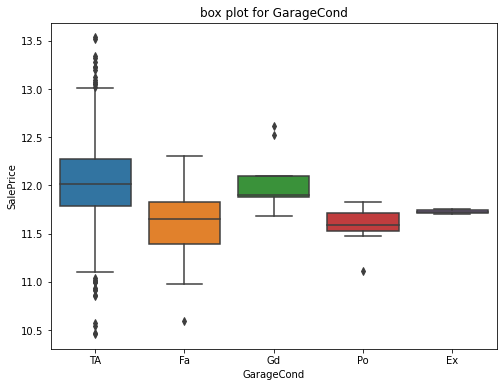

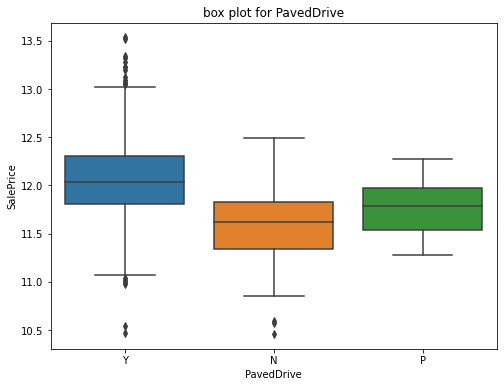

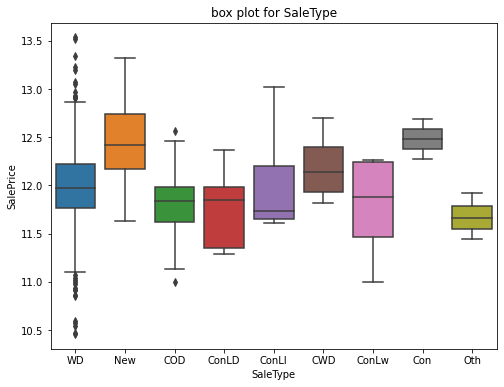

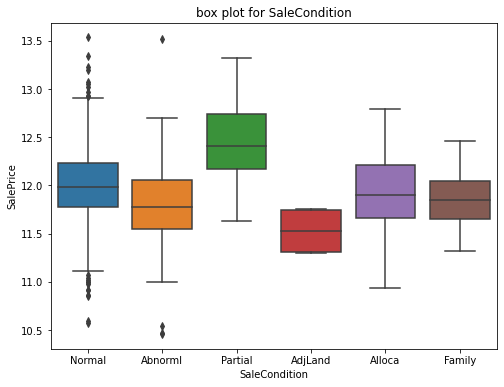

In [33]:
#boxplot categorical col vs target variable
for col in data_categorical:
    plt.figure(figsize=[8,6])
    sns.boxplot(x=data_frame[col], y=data_frame['SalePrice'])
    plt.title( "box plot for "+col)
    plt.show()

In [34]:
#From above plot - it can be observed Utilities has only one value spread and column is not significant
data_frame = data_frame.drop(['Utilities'], axis=1)
data_categorical = list(set(data_categorical) - set(['Utilities']))

In [35]:
data_frame.shape

(1460, 69)

#### Feature engineering

In [36]:
data_categorical

['LotConfig',
 'BsmtFinType2',
 'MSZoning',
 'GarageCond',
 'Neighborhood',
 'GarageQual',
 'BsmtExposure',
 'Functional',
 'BsmtQual',
 'Electrical',
 'BldgType',
 'CentralAir',
 'SaleCondition',
 'HouseStyle',
 'GarageFinish',
 'LotShape',
 'Condition1',
 'ExterQual',
 'HeatingQC',
 'RoofStyle',
 'BsmtCond',
 'RoofMatl',
 'BsmtFinType1',
 'ExterCond',
 'KitchenQual',
 'Street',
 'SaleType',
 'LandSlope',
 'Exterior2nd',
 'LandContour',
 'Condition2',
 'Foundation',
 'Heating',
 'PavedDrive',
 'GarageType',
 'Exterior1st',
 'MasVnrType']

In [37]:
#From data dictionary, Ordinal categorical variables are
ordinal_cat_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                    'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
data_frame.shape

(1460, 69)

#### label encoding for the ordinal categorical columns

In [38]:
#label encoding ordered categorical columns
for col in ordinal_cat_cols:
    values = data_frame[col].unique()
    map_vals = {}
    for idx, val in enumerate(values):
        map_vals[val] = idx
    data_frame[col] = data_frame[col].map(map_vals)

In [39]:
nominal_cat_cols = list(set(data_categorical) - set(ordinal_cat_cols))

In [40]:
#check unique values in nominal_cat_cols
#for col in nominal_cat_cols:
    #print("column - "+ col)
    #print(data_frame[col].unique())

#### create dummy variables for the nominal columns

In [41]:
data_frame = pd.get_dummies(data_frame, columns=nominal_cat_cols, drop_first=True)

In [42]:
X = data_frame.drop(columns='SalePrice')
y = data_frame['SalePrice']

### Model Building

#### Standardization

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))
X_scaled.columns = X.columns

#### Split the data into train and test

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7, 
                                                    test_size=0.3, random_state=100)

#### Using RFE to select optimal features

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [47]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [48]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [49]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [50]:
rfe_sel_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtQual',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'YearBuilt_Age',
 'YearRemodAdd_Age',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'SaleCondition_Partial',
 'Condition1_Norm',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'SaleType_New',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'Condition2_PosN',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'MasVnrType_None']

#### Lasso regression model

In [51]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Lasso
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

# train score
y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))


# test score
y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.905711351298425
0.8714754770058314


In [52]:
model_parameter = list(lm.coef_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
list(zip(col,model_parameter))

[('LotArea', 0.066),
 ('OverallQual', 0.117),
 ('OverallCond', 0.04),
 ('MasVnrArea', 0.01),
 ('BsmtQual', 0.017),
 ('BsmtFinSF1', 0.048),
 ('TotalBsmtSF', 0.031),
 ('HeatingQC', -0.016),
 ('FullBath', 0.035),
 ('HalfBath', 0.022),
 ('TotRmsAbvGrd', 0.057),
 ('Fireplaces', 0.033),
 ('GarageArea', 0.048),
 ('WoodDeckSF', 0.015),
 ('YearBuilt_Age', -0.071),
 ('YearRemodAdd_Age', -0.032),
 ('MSZoning_FV', 0.046),
 ('MSZoning_RH', 0.025),
 ('MSZoning_RL', 0.098),
 ('MSZoning_RM', 0.069),
 ('Neighborhood_BrDale', -0.011),
 ('Neighborhood_CollgCr', -0.021),
 ('Neighborhood_Crawfor', 0.02),
 ('Neighborhood_Edwards', -0.017),
 ('Neighborhood_Gilbert', -0.021),
 ('Neighborhood_Mitchel', -0.015),
 ('Neighborhood_NAmes', -0.016),
 ('Neighborhood_NWAmes', -0.016),
 ('Neighborhood_Sawyer', -0.017),
 ('Neighborhood_SawyerW', -0.012),
 ('SaleCondition_Partial', 0.006),
 ('Condition1_Norm', 0.016),
 ('RoofMatl_CompShg', 0.142),
 ('RoofMatl_Membran', 0.029),
 ('RoofMatl_Metal', 0.028),
 ('RoofMatl_Roll

In [53]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [1]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

NameError: name 'pd' is not defined

In [55]:
def r2_score(cv_result, is_log=False):
    plt.figure(figsize=(12,6))
    plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
    plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])
    if is_log == True:
        plt.xscale('log')
    plt.ylabel('R2 Score')
    plt.xlabel('Alpha')
    plt.show()

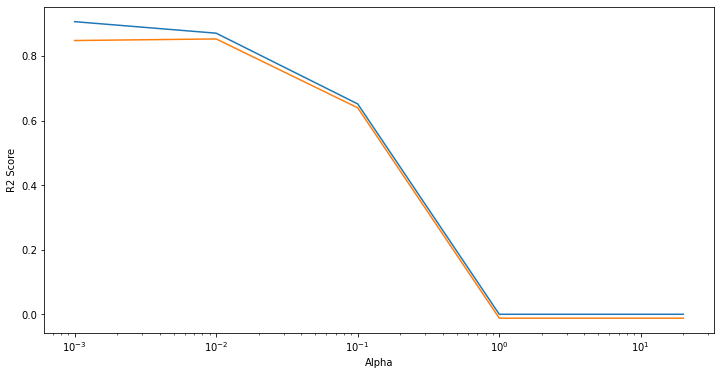

In [56]:
r2_score(cv_result_l, True)

In [57]:
#optimal value of lambda for ridge and lasso regression.
optimal_lasso_alpha =  model_cv.best_params_['alpha']
print('Optimal value of lambda for lasso regression = ', optimal_lasso_alpha)

Optimal value of lambda for lasso regression =  0.01


In [58]:
# Using optimal value of alpha, run the model again
#Lasso
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score


final_lasso = Lasso(alpha=optimal_lasso_alpha)
final_lasso.fit(X_train,y_train)

# train score
y_train_pred = final_lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))


# test score
y_test_pred  = final_lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.87001270340077
0.863899341661934


In [59]:
#Which variables are significant in predicting the price of a house,
#How well those variables describe the price of a house.

model_param = list(abs(final_lasso.coef_))
cols = X_train.columns
final_lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
final_lasso_coef.columns = ['Significant Feature','Coef']

final_lasso_coef.sort_values(by = 'Coef', ascending=False).head(10)


,Significant Feature,Coef
1,OverallQual,0.145038
0,LotArea,0.054202
10,TotRmsAbvGrd,0.053085
12,GarageArea,0.051827
14,YearBuilt_Age,0.047638
5,BsmtFinSF1,0.041818
15,YearRemodAdd_Age,0.034542
11,Fireplaces,0.034281
8,FullBath,0.029850
42,Condition2_PosN,0.022463


In [60]:
len(final_lasso_coef[final_lasso_coef['Coef'] == 0])

23

#### Ridge regression model

In [61]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Ridge
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))


# test score
y_test_pred  = ridge.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9091800766855264
0.8690200015816796


In [62]:
model_parameter = list(ridge.coef_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
list(zip(col,model_parameter))

[('LotArea', 0.067),
 ('OverallQual', 0.114),
 ('OverallCond', 0.04),
 ('MasVnrArea', 0.054),
 ('BsmtQual', 0.017),
 ('BsmtFinSF1', 0.048),
 ('TotalBsmtSF', 0.036),
 ('HeatingQC', -0.016),
 ('FullBath', 0.034),
 ('HalfBath', 0.023),
 ('TotRmsAbvGrd', 0.058),
 ('Fireplaces', 0.033),
 ('GarageArea', 0.05),
 ('WoodDeckSF', 0.016),
 ('YearBuilt_Age', -0.07),
 ('YearRemodAdd_Age', -0.033),
 ('MSZoning_FV', 0.081),
 ('MSZoning_RH', 0.044),
 ('MSZoning_RL', 0.169),
 ('MSZoning_RM', 0.131),
 ('Neighborhood_BrDale', -0.015),
 ('Neighborhood_CollgCr', -0.024),
 ('Neighborhood_Crawfor', 0.02),
 ('Neighborhood_Edwards', -0.018),
 ('Neighborhood_Gilbert', -0.023),
 ('Neighborhood_Mitchel', -0.018),
 ('Neighborhood_NAmes', -0.022),
 ('Neighborhood_NWAmes', -0.02),
 ('Neighborhood_Sawyer', -0.02),
 ('Neighborhood_SawyerW', -0.015),
 ('SaleCondition_Partial', 0.007),
 ('Condition1_Norm', 0.016),
 ('RoofMatl_CompShg', 0.204),
 ('RoofMatl_Membran', 0.041),
 ('RoofMatl_Metal', 0.04),
 ('RoofMatl_Roll', 0

In [63]:
# Gridsearch Operation on Training data set
# Objective - Find optimal value of alpha

folds = KFold(n_splits=10,shuffle=True,random_state=100)

hyper_param = {'alpha':[0.001, 0.01, 0.1, 0.5, 0.9, 1.0, 5.0, 10.0,20.0]}

ridgeModel = Ridge()

ridgemodel_cv = GridSearchCV(estimator = ridgeModel,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

ridgemodel_cv.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 0.9, 1.0, 5.0, 10.0,
                                   20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [64]:
cv_result_r = pd.DataFrame(ridgemodel_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005693,0.001970,0.003314,0.001069,0.001,{'alpha': 0.001},0.895355,0.781659,0.913148,0.779544,0.755873,0.902150,0.768867,0.731215,0.930434,0.854760,0.831301,0.071377,9,0.909981,0.906524,0.908504,0.911507,0.908971,0.909176,0.910710,0.911184,0.906828,0.913988,0.909737,0.002133
1,0.005498,0.001364,0.003606,0.001188,0.010,{'alpha': 0.01},0.895347,0.781653,0.913148,0.779549,0.755974,0.902166,0.768942,0.731317,0.930434,0.854782,0.831331,0.071347,8,0.909981,0.906524,0.908504,0.911507,0.908971,0.909176,0.910710,0.911184,0.906828,0.913988,0.909737,0.002133
2,0.005610,0.001506,0.003380,0.001226,0.100,{'alpha': 0.1},0.895261,0.781593,0.913152,0.779602,0.756979,0.902316,0.769686,0.732323,0.930436,0.854998,0.831635,0.071051,7,0.909981,0.906524,0.908503,0.911506,0.908971,0.909176,0.910710,0.911183,0.906828,0.913988,0.909737,0.002133
3,0.006743,0.001705,0.004053,0.001245,0.500,{'alpha': 0.5},0.894887,0.781332,0.913168,0.779835,0.761315,0.902937,0.772901,0.736675,0.930440,0.855923,0.832941,0.069780,6,0.909971,0.906520,0.908493,0.911496,0.908959,0.909162,0.910701,0.911173,0.906817,0.913974,0.909727,0.002132
4,0.005908,0.001212,0.003887,0.000913,0.900,{'alpha': 0.9},0.894519,0.781079,0.913183,0.780061,0.765455,0.903492,0.775975,0.740841,0.930439,0.856790,0.834183,0.068582,5,0.909949,0.906509,0.908471,0.911474,0.908934,0.909131,0.910681,0.911151,0.906795,0.913944,0.909704,0.002129


In [65]:
#optimal value of lambda for ridge and lasso regression.
optimal_ridge_alpha =  ridgemodel_cv.best_params_['alpha']
print('Optimal value of lambda for ridge regression = ', optimal_ridge_alpha)

Optimal value of lambda for ridge regression =  20.0


In [66]:
#Ridge
ridge = Ridge(alpha=20)
ridge.fit(X_train,y_train)

# train score
y_train_pred = ridge.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))


# test score
y_test_pred  = ridge.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9045777738801649
0.8698096321234503


In [67]:
#Which variables are significant in predicting the price of a house,
#How well those variables describe the price of a house.

model_param = list(abs(ridge.coef_))
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Significant Feature','Coef']

ridge_coef.sort_values(by = 'Coef', ascending=False).head(10)

,Significant Feature,Coef
32,RoofMatl_CompShg,0.114388
1,OverallQual,0.112133
18,MSZoning_RL,0.087999
36,RoofMatl_Tar&Grv,0.075140
14,YearBuilt_Age,0.068821
38,RoofMatl_WdShngl,0.067483
0,LotArea,0.064490
19,MSZoning_RM,0.058735
37,RoofMatl_WdShake,0.056284
10,TotRmsAbvGrd,0.055425


## Final Model

In [68]:
# Lasso Model with alpha 0.01 seems to be right model as it seems more generalizable and also eliminates the columns
# Ridge Model with alpha 20 seems to be slightly overfit

#Lasso Model
# train score
y_train_pred = final_lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))


# test score
y_test_pred  = final_lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.87001270340077
0.863899341661934


In [69]:
#top predictors
final_lasso_coef.sort_values(by = 'Coef', ascending=False).head(10)

,Significant Feature,Coef
1,OverallQual,0.145038
0,LotArea,0.054202
10,TotRmsAbvGrd,0.053085
12,GarageArea,0.051827
14,YearBuilt_Age,0.047638
5,BsmtFinSF1,0.041818
15,YearRemodAdd_Age,0.034542
11,Fireplaces,0.034281
8,FullBath,0.029850
42,Condition2_PosN,0.022463


# Subjective Questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? 

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

What will be the most important predictor variables after the change is implemented?

In [70]:
#What is the optimal value of alpha for ridge and lasso regression? 
print("optimal value of alpha for lasso " + str(optimal_lasso_alpha))
print("optimal value of alpha for ridge " + str(optimal_ridge_alpha))

optimal value of alpha for lasso 0.01
optimal value of alpha for ridge 20.0


In [71]:
#What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
double_alpha = optimal_lasso_alpha * 2
print(double_alpha)
lasso_double_alpha = Lasso(alpha=double_alpha)
lasso_double_alpha.fit(X_train,y_train)

# train score
y_train_pred = lasso_double_alpha.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))


# test score
y_test_pred  = lasso_double_alpha.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.02
0.8460943789876666
0.8445630550028134


In [72]:
#Which variables are significant in predicting the price of a house,
#How well those variables describe the price of a house.

model_param = list(abs(lasso_double_alpha.coef_))
cols = X_train.columns
lasso_double_alpha_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_double_alpha_coef.columns = ['Significant Feature','Coef']

lasso_double_alpha_coef.sort_values(by = 'Coef', ascending=False).head(10)


,Significant Feature,Coef
1,OverallQual,0.157434
12,GarageArea,0.051178
0,LotArea,0.049535
10,TotRmsAbvGrd,0.047364
15,YearRemodAdd_Age,0.040046
14,YearBuilt_Age,0.038674
11,Fireplaces,0.035549
5,BsmtFinSF1,0.033841
8,FullBath,0.023340
7,HeatingQC,0.015006


In [73]:
len(lasso_double_alpha_coef[lasso_double_alpha_coef['Coef'] == 0])

30

In [74]:
double_alpha = optimal_ridge_alpha * 2
print(double_alpha)
ridge_double_alpha = Ridge(alpha=double_alpha)
ridge_double_alpha.fit(X_train,y_train)

# train score
y_train_pred = ridge_double_alpha.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))


# test score
y_test_pred  = ridge_double_alpha.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

40.0
0.900304410368943
0.8695325827664062


In [75]:
#Which variables are significant in predicting the price of a house,
#How well those variables describe the price of a house.

model_param = list(abs(ridge_double_alpha.coef_))
cols = X_train.columns
ridge_double_alpha_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_double_alpha_coef.columns = ['Significant Feature','Coef']

ridge_double_alpha_coef.sort_values(by = 'Coef', ascending=False).head(10)

,Significant Feature,Coef
1,OverallQual,0.109853
32,RoofMatl_CompShg,0.078363
14,YearBuilt_Age,0.065861
18,MSZoning_RL,0.062463
0,LotArea,0.062256
10,TotRmsAbvGrd,0.054078
36,RoofMatl_Tar&Grv,0.051147
38,RoofMatl_WdShngl,0.050244
12,GarageArea,0.047778
5,BsmtFinSF1,0.045961


On doubling the aplha 

for Lasso - r2_score drops, also more number of columns have coef 0 and can be eleminated

for Ridge - r2_score slightly drops

In [76]:
#What will be the most important predictor variables after the change is implemented?
lasso_double_alpha_coef.sort_values(by = 'Coef', ascending=False).head(5)

,Significant Feature,Coef
1,OverallQual,0.157434
12,GarageArea,0.051178
0,LotArea,0.049535
10,TotRmsAbvGrd,0.047364
15,YearRemodAdd_Age,0.040046


In [77]:
#What will be the most important predictor variables after the change is implemented?
ridge_double_alpha_coef.sort_values(by = 'Coef', ascending=False).head(5)

,Significant Feature,Coef
1,OverallQual,0.109853
32,RoofMatl_CompShg,0.078363
14,YearBuilt_Age,0.065861
18,MSZoning_RL,0.062463
0,LotArea,0.062256


Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [78]:
#Lasso regression has r2_score which is more generalizable, and also it helps to eliminate the inpendent variables with coef marked 0
#hence will choose Lasso with optmal aplha 0.01

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. 
Which are the five most important predictor variables now?

In [79]:
X_train.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,YearBuilt_Age,YearRemodAdd_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_BrDale,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_Sawyer,Neighborhood_SawyerW,SaleCondition_Partial,Condition1_Norm,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleType_New,Exterior2nd_AsphShn,Exterior2nd_CBlock,Condition2_PosN,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Exterior1st_AsphShn,Exterior1st_BrkFace,Exterior1st_CBlock,MasVnrType_None
210,-0.927178,-0.795151,0.381743,-0.805930,0.406942,0.642466,0.010512,1.193952,-1.026041,-0.761621,-0.934130,-0.951226,-2.212963,-0.946448,1.532424,1.689368,-0.215859,-0.105263,0.518133,-0.418955,-0.105263,-0.338384,-0.190252,3.687818,-0.239176,-0.186352,-0.426833,-0.229416,-0.231065,-0.205214,-0.305995,0.39841,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.301962,-0.045376,-0.02618,-0.037037,1.141420,-0.892086,-0.129279,-0.02618,-0.188311,-0.02618,0.821165
318,0.172930,0.651479,-0.517200,1.305901,-0.984475,0.891950,0.398240,-0.891179,0.789741,1.227585,1.527656,0.600495,0.856307,1.301884,-0.719786,-0.394133,-0.215859,-0.105263,0.518133,-0.418955,-0.105263,-0.338384,-0.190252,-0.271163,-0.239176,-0.186352,-0.426833,-0.229416,-0.231065,-0.205214,-0.305995,0.39841,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.301962,-0.045376,-0.02618,-0.037037,-0.876102,1.120968,-0.129279,-0.02618,-0.188311,-0.02618,-1.217782
239,-0.067776,-0.071836,-1.416142,-0.805930,0.406942,0.105796,-0.130677,1.193952,-1.026041,1.227585,0.296763,0.600495,-1.183635,-0.946448,0.870009,1.689368,-0.215859,-0.105263,0.518133,-0.418955,-0.105263,-0.338384,-0.190252,3.687818,-0.239176,-0.186352,-0.426833,-0.229416,-0.231065,-0.205214,-0.305995,0.39841,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.301962,-0.045376,-0.02618,-0.037037,1.141420,-0.892086,-0.129279,-0.02618,-0.188311,-0.02618,0.821165
986,-1.031357,-0.071836,2.179628,-0.805930,0.406942,-1.413200,-0.493660,0.151386,-1.026041,-0.761621,-0.934130,-0.951226,-1.019878,1.358741,2.029235,-0.878668,-0.215859,-0.105263,-1.930005,2.386891,-0.105263,-0.338384,-0.190252,-0.271163,-0.239176,-0.186352,-0.426833,-0.229416,-0.231065,-0.205214,-0.305995,-2.50998,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.301962,-0.045376,-0.02618,-0.037037,1.141420,-0.892086,-0.129279,-0.02618,-0.188311,-0.02618,0.821165
1416,0.435465,-1.518467,0.381743,-0.805930,0.406942,-1.413200,-0.082157,0.151386,0.789741,-0.761621,2.758549,-0.951226,0.407146,-0.946448,2.857254,1.689368,-0.215859,-0.105263,-1.930005,2.386891,-0.105263,-0.338384,-0.190252,-0.271163,-0.239176,-0.186352,-0.426833,-0.229416,-0.231065,-0.205214,-0.305995,0.39841,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.301962,-0.045376,-0.02618,-0.037037,-0.876102,1.120968,-0.129279,-0.02618,-0.188311,-0.02618,0.821165


In [80]:
X_train_new = X_train.drop(['OverallQual','LotArea','TotRmsAbvGrd','GarageArea','YearBuilt_Age'], axis=1)
X_test_new = X_test.drop(['OverallQual','LotArea','TotRmsAbvGrd','GarageArea','YearBuilt_Age'], axis=1)
lasso_new_predictors= Lasso(alpha=0.01)
lasso_new_predictors.fit(X_train,y_train)

# train score
y_train_pred = lasso_new_predictors.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))


# test score
y_test_pred  = lasso_new_predictors.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.87001270340077
0.863899341661934


In [81]:
#Which variables are significant in predicting the price of a house,
#How well those variables describe the price of a house.

model_param = list(abs(lasso_new_predictors.coef_))
cols = X_train_new.columns
lasso_new_predictors_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_new_predictors_coef.columns = ['Significant Feature','Coef']

lasso_new_predictors_coef.sort_values(by = 'Coef', ascending=False).head(10)

,Significant Feature,Coef
1,MasVnrArea,0.145038
0,OverallCond,0.054202
10,YearRemodAdd_Age,0.053085
12,MSZoning_RH,0.051827
14,MSZoning_RM,0.047638
5,HeatingQC,0.041818
15,Neighborhood_BrDale,0.034542
11,MSZoning_FV,0.034281
8,Fireplaces,0.029850
42,Exterior1st_BrkFace,0.022463
